# Tenencia del producto préstamo en el DataSet de Banca Checo  

In [2]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.core.multiarray

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Para bajarlo directamente de GitHub
#url="https://raw.githubusercontent.com/osmaac/Entrega-TFM/master/DFTenenciaProductos_wo_LoanPayment.csv"
#df_original=pd.read_csv(url)

In [4]:
# Cargamos los datos que hemos procesado en R
df_original= pd.read_csv("C://Master Data Science/Master en Data Science/TFM/Transacciones de Banco Checo/DFTenenciaProductos_wo_LoanPayment.csv")

In [5]:
#Comenzamos a revisar que el DF se haya importado correctamente
df_original.shape

(4500, 70)

In [6]:
df_original.head()

,Unnamed: 0,district_id,account_id,frequency,Date_Account,client_id_owner,client_id_disponent,sex_owner,birth_owner,sex_disponent,...,Num_Sym_Pension,Num_Sym_Insurance,Num_Sym_NegBal,Num_Sym_Household,Num_Sym_Statement,Num_Sym_IntDep,Num_Sym_LoanPayment,Balance_in_negative,account_disponent_bin,account_loan_bin
0,1,1,1938,Monthly,1994-06-25,2354,NaN,M,1967-12-21,NaN,...,0,0,0,50,49,54,0,0,0,0
1,2,1,1562,Monthly,1995-08-30,1894,NaN,F,1947-11-05,NaN,...,0,0,0,36,35,36,0,0,0,0
2,3,1,7099,Monthly,1996-08-20,8568,NaN,F,1971-12-03,NaN,...,0,24,0,24,23,28,7,0,0,1
3,4,1,2316,Monthly,1997-07-21,2802,NaN,F,1966-11-29,NaN,...,0,0,0,13,12,17,0,0,0,0
4,5,1,1570,Monthly,1994-03-12,1903,NaN,F,1939-08-30,NaN,...,57,0,0,53,52,53,0,0,0,0


In [7]:
# Vamos a analizar si hay missings al cargar los datos a Python
df_original.columns[df_original.isnull().sum()!=0]
#Vemos que las variables con missings provienen de variables que ya tenían esos missings en el DataFrame generado con R,
#ya que el disponent (autorizado), los préstamos y las tarjetas no son productos que tengan asociados 
#todas las cuentas (sólo las cuentas que los hayan contratado) 

Index(['client_id_disponent', 'sex_disponent', 'birth_disponent', 'loan_id',
       'Date_Loan', 'Amount_Loan', 'Duration_Loan', 'Payments_Loan', 'status',
       'Status_Loan', 'owner_card_date'],
      dtype='object')

In [8]:
#Vemos como se han importado las variables del DataFrame de R al DataFrame que vamos a utilizar en Python 
print(df_original.iloc[:,0:32].dtypes)
print(df_original.iloc[:,31:61].dtypes)
print(df_original.iloc[:,60:70].dtypes)
#Observamos que las variables de factor y de fecha han modificado su tipo de variable, 
#por lo que tendremos que trabajar con ellas

Unnamed: 0                        int64
district_id                       int64
account_id                        int64
frequency                        object
Date_Account                     object
client_id_owner                   int64
client_id_disponent             float64
sex_owner                        object
birth_owner                      object
sex_disponent                    object
birth_disponent                  object
loan_id                         float64
Date_Loan                        object
Amount_Loan                     float64
Duration_Loan                   float64
Payments_Loan                   float64
status                           object
Status_Loan                      object
Ord_Insurance                     int64
Ord_Insurance_amount              int64
Ord_Household_Payment             int64
Ord_Household_Payment_amount      int64
Ord_Loan_Payment                  int64
Ord_Loan_Payment_amount         float64
Ord_Leasing                       int64


In [9]:
#Transformamos a formato fecha las variables que originalmente eran fecha en R
df_original[["Date_Account","birth_owner", "birth_disponent", "Date_Loan", "owner_card_date"]]=df_original[["Date_Account","birth_owner", "birth_disponent", "Date_Loan", "owner_card_date"]].apply(pd.to_datetime)
from datetime import datetime
df_original['Date_Account']=df_original['Date_Account'].apply(datetime.toordinal)
df_original['birth_owner']=df_original['birth_owner'].apply(datetime.toordinal)
df_original['birth_disponent']=df_original['birth_disponent'].apply(datetime.toordinal)
df_original['Date_Loan']=df_original['Date_Loan'].apply(datetime.toordinal)
df_original['owner_card_date']=df_original['owner_card_date'].apply(datetime.toordinal)

(array([3443.,  240.,  263.,    0.,    0.,    0.,    0.,    0.,    0.,
         554.]),
 array([  818. ,  9303.9, 17789.8, 26275.7, 34761.6, 43247.5, 51733.4,
        60219.3, 68705.2, 77191.1, 85677. ]),
 <a list of 10 Patch objects>)

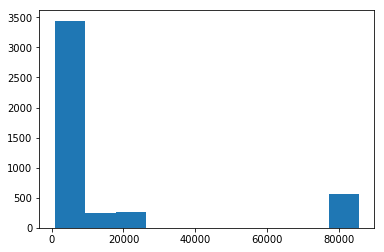

In [10]:
plt.hist(df_original['crimes_95'])

(array([ 596., 1052.,  499.,  760.,  370.,  317.,  128.,  224.,    0.,
         554.]),
 array([0.01354271, 0.01929884, 0.02505497, 0.0308111 , 0.03656723,
        0.04232336, 0.04807949, 0.05383562, 0.05959176, 0.06534789,
        0.07110402]),
 <a list of 10 Patch objects>)

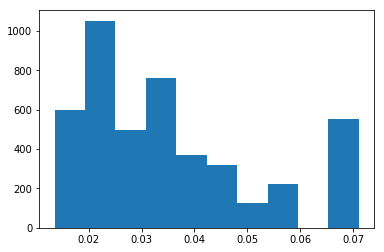

In [11]:
plt.hist(df_original['crimes_95_ratio'])

(array([3683.,  263.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         554.]),
 array([  888. , 10709.9, 20531.8, 30353.7, 40175.6, 49997.5, 59819.4,
        69641.3, 79463.2, 89285.1, 99107. ]),
 <a list of 10 Patch objects>)

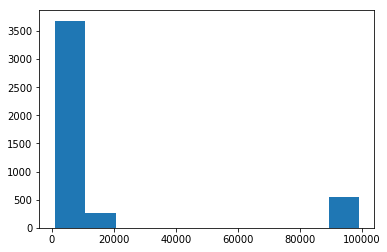

In [12]:
plt.hist(df_original['crimes_96'])

(array([1141.,  804.,  726.,  637.,  415.,   88.,  135.,    0.,    0.,
         554.]),
 array([0.0159461 , 0.02257646, 0.02920682, 0.03583717, 0.04246753,
        0.04909789, 0.05572825, 0.06235861, 0.06898896, 0.07561932,
        0.08224968]),
 <a list of 10 Patch objects>)

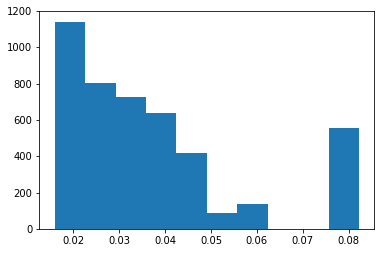

In [13]:
plt.hist(df_original['crimes_96_ratio'])

(array([200., 354., 644., 992., 517., 757., 259., 138.,  85., 554.]),
 array([ 81. ,  89.6,  98.2, 106.8, 115.4, 124. , 132.6, 141.2, 149.8,
        158.4, 167. ]),
 <a list of 10 Patch objects>)

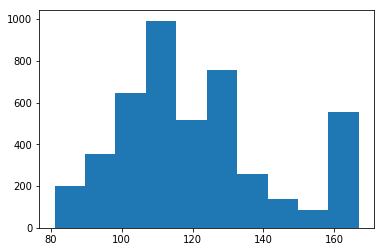

In [14]:
plt.hist(df_original['entrepreneurs'])

(array([ 969.,  322., 1256.,  793.,  312.,  388.,  177.,  192.,   43.,
          48.]),
 array([0.00013859, 0.00041431, 0.00069003, 0.00096575, 0.00124147,
        0.00151719, 0.0017929 , 0.00206862, 0.00234434, 0.00262006,
        0.00289578]),
 <a list of 10 Patch objects>)

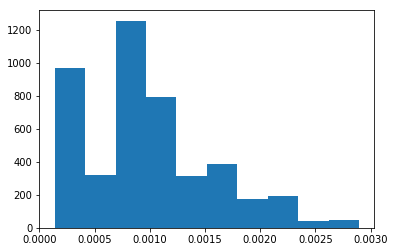

In [15]:
plt.hist(df_original['entrepreneurs_ratio'])

In [16]:
#Creamos un DataFrame con las variables que vamos a considerar numéricas
df_num=df_original[['Date_Account','birth_owner', 'birth_disponent','owner_card_date','Ord_Insurance', 'Ord_Insurance_amount',
                    'Ord_Household_Payment','Ord_Household_Payment_amount', 'Ord_Loan_Payment', 'Ord_Leasing',
                    'Ord_Empty', 'Ord_Empty_amount', 'num_inhabitants', 'municip < 499', 'municip 500-1999',
                    'municip 2000-9999', 'municip > 10000', 'num_cities', 'avg_salary',  
                    'Num_Type_Credit', 'Num_Type_VYBER', 'Num_Type_Withdrawal', 'Num_Op_Null', 'Num_Op_Remittances',
                    'Num_Op_Collection','Num_Op_CashCredit', 'Num_Op_WithdrawalCash','Num_Op_WithdrawalCreditCard',
                    'Num_Sym_Null', 'Num_Sym_Null2','Num_Sym_Pension', 'Num_Sym_Insurance', 'Num_Sym_NegBal',
                    'Num_Sym_Household', 'Num_Sym_Statement', 'Num_Sym_IntDep', 'Num_Sym_LoanPayment', 
                    'Balance_in_negative','Ord_Loan_Payment_amount', 'Ord_Leasing_amount','ratio_urban_inhabitants',
                    'unemployment_rate_95','unemployment_rate_96', 'crimes_95_ratio', 'crimes_96_ratio', 'entrepreneurs_ratio' ]] 

In [17]:
#Creamos un DataFrame con las variables que vamos a considerar categóricas
df_cat=df_original[['account_disponent_bin','frequency', 'sex_owner', 'owner_card_type',
       'sex_disponent']]
#Vemos que tipos tienen las variables que queremos que sean categóricas
df_cat.dtypes

account_disponent_bin     int64
frequency                object
sex_owner                object
owner_card_type           int64
sex_disponent            object
dtype: object

In [18]:
#Ponemos las variables "owner_card_type" y "account_disponent_bin" como string para poder obtener dummies
df_cat["owner_card_type"]=df_cat["owner_card_type"].astype(str)
df_cat["account_disponent_bin"]=df_cat["account_disponent_bin"].astype(str)

C:\Users\osmaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\osmaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_cat_dumm=pd.get_dummies(df_cat)

In [20]:
df_cat_dumm.dtypes
#Al pasar a dummies las variables, hemos incrementado en 8 el número total de variables

account_disponent_bin_0    uint8
account_disponent_bin_1    uint8
frequency_After_trans      uint8
frequency_Monthly          uint8
frequency_Weekly           uint8
sex_owner_F                uint8
sex_owner_M                uint8
owner_card_type_0          uint8
owner_card_type_1          uint8
owner_card_type_2          uint8
owner_card_type_3          uint8
sex_disponent_F            uint8
sex_disponent_M            uint8
dtype: object

In [21]:
df = pd.concat([df_num, df_cat_dumm], axis = 1)
df.head()

,Date_Account,birth_owner,birth_disponent,owner_card_date,Ord_Insurance,Ord_Insurance_amount,Ord_Household_Payment,Ord_Household_Payment_amount,Ord_Loan_Payment,Ord_Leasing,...,frequency_Monthly,frequency_Weekly,sex_owner_F,sex_owner_M,owner_card_type_0,owner_card_type_1,owner_card_type_2,owner_card_type_3,sex_disponent_F,sex_disponent_M
0,728104,718421,1,1,0,0,1,6646,0,1,...,1,0,0,1,1,0,0,0,0,0
1,728535,711070,1,1,0,0,1,1933,0,0,...,1,0,1,0,1,0,0,0,0,0
2,728891,719864,1,1,1,528,1,236,1,0,...,1,0,1,0,1,0,0,0,0,0
3,729226,718034,1,1,0,0,1,2111,0,0,...,1,0,1,0,1,0,0,0,0,0
4,727999,708081,1,1,0,0,1,2865,0,0,...,1,0,1,0,1,0,0,0,0,0


# Vamos a generar un primer modelo benchmark y vamos a ver si podemos obtener una simplificación de los datos con PCA

In [22]:
X = df
y = df_original["account_loan_bin"] 

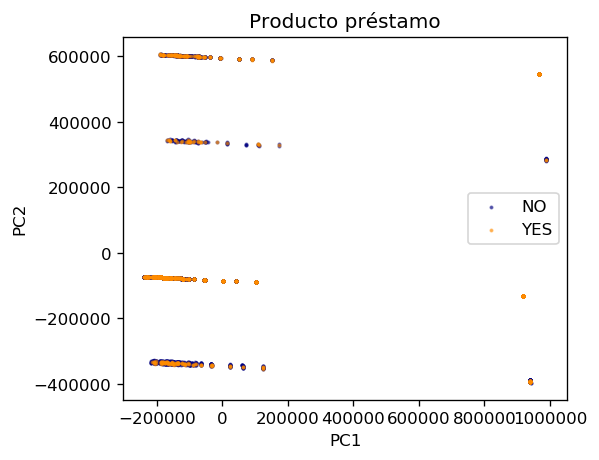

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='NO', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='YES', s=2, color='darkorange')
plt.legend()
plt.title('Producto préstamo')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [24]:
#Del gráfico anterior no consigo sacar nada en claro
pca2 = PCA(n_components=2)
pca2.fit(X)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
#De los componentes de momento tampoco sacamos ninguna conclusión. Las variables están en escalas muy distintas y por eso 
#el PCA genera resultados tan "positivos" en cuanto a explicabilidad de las 2 primeras componentes principales (74%)

[[-1.41899144e-05  3.76112969e-04  2.97418890e-02  6.65291847e-02
   1.10456611e-08  6.97541425e-05 -8.13236484e-09  4.49340524e-05
   1.92086571e-09  1.51642509e-08  1.86478703e-08  1.40767450e-04
   9.97335487e-01 -4.90984072e-05 -2.32177716e-05 -5.72845134e-06
  -5.87189940e-07 -5.04538511e-06  3.32207470e-03  2.80449534e-06
   4.49809420e-07  3.28474445e-06  1.27687279e-06  2.76764632e-07
  -1.80003778e-06  3.32766034e-06  2.90427565e-06  5.53513591e-07
   3.95002344e-06  7.30692720e-07 -9.05250243e-07  3.92910953e-07
   9.53161760e-08  5.39244978e-07  4.59238401e-07  1.27687279e-06
   3.09695045e-07  3.58832264e-07  4.66633453e-05  4.45604444e-05
   3.74408574e-05 -2.48007137e-06 -2.94393181e-06  3.92241114e-08
   4.83722236e-08 -1.07124667e-09 -4.19281049e-08  4.19281049e-08
  -4.73145522e-09 -5.56504706e-09  1.02965023e-08  3.63305616e-09
  -3.63305616e-09 -9.12049431e-08  6.41757903e-08  4.74961153e-09
   2.22795413e-08  2.15292322e-08  2.03988727e-08]
 [ 3.04437415e-06  3.7370

In [25]:
#Empezamos con modelos sencillos. Estos modelos han de predecir si una cuenta (account) contrata préstamo (loan=1) o no (loan=0)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
#Generamos conjuntos de train y de test. Para el test usamos el 20% de las observaciones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
#Probamos una Regresión logística
clf_LR=LogisticRegression(random_state=0) #vamos a incluir Random State en todos los modelos para poder reproducirlos
clf_LR.fit(X_train,y_train)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
#Creamos una función para poder evaluar el modelo, ver si genera overfitting, underfitting y tener detallada la matriz de
#confusión de los modelos que generemos
def eval_modelo (clf,X_train,y_train, X_test,y_test):
    print("Datos de train:")
    print("El accuracy es",accuracy_score(y_train,clf.predict(X_train))*100,"%")
    print("La precision es",precision_score(y_train,clf.predict(X_train))*100, "%")
    print("El recall es",recall_score(y_train,clf.predict(X_train))*100, "%")
    print("El F1 Score es",f1_score(y_train,clf.predict(X_train))*100,"%")
    tn, fp, fn, tp=confusion_matrix(y_train,clf.predict(X_train)).ravel()
    print("tn:",tn," fp:",fp," fn:",fn," tp:",tp)
    print("Datos de test:")
    print("El accuracy es",accuracy_score(y_test,clf.predict(X_test))*100,"%")
    print("La precision es",precision_score(y_test,clf.predict(X_test))*100, "%")
    print("El recall es",recall_score(y_test,clf.predict(X_test))*100,"%")
    print("El F1 Score es",f1_score(y_test,clf.predict(X_test))*100,"%")
    tn_t, fp_t, fn_t, tp_t=confusion_matrix(y_test,clf.predict(X_test)).ravel()
    print("tn:",tn_t," fp:",fp_t," fn:",fn_t," tp:",tp_t)          

In [29]:
eval_modelo(clf_LR,X_train,y_train, X_test,y_test)

Datos de train:
El accuracy es 97.19444444444446 %
La precision es 95.24793388429752 %
El recall es 85.52875695732838 %
El F1 Score es 90.12707722385143 %
tn: 3038  fp: 23  fn: 78  tp: 461
Datos de test:
El accuracy es 96.55555555555554 %
La precision es 94.44444444444444 %
El recall es 83.21678321678321 %
El F1 Score es 88.47583643122677 %
tn: 750  fp: 7  fn: 24  tp: 119


In [30]:
#Probamos con un árbol de decisión
clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
eval_modelo(clf_tree,X_train,y_train, X_test,y_test)

Datos de train:
El accuracy es 100.0 %
La precision es 100.0 %
El recall es 100.0 %
El F1 Score es 100.0 %
tn: 3061  fp: 0  fn: 0  tp: 539
Datos de test:
El accuracy es 100.0 %
La precision es 100.0 %
El recall es 100.0 %
El F1 Score es 100.0 %
tn: 757  fp: 0  fn: 0  tp: 143


<function matplotlib.pyplot.show(*args, **kw)>

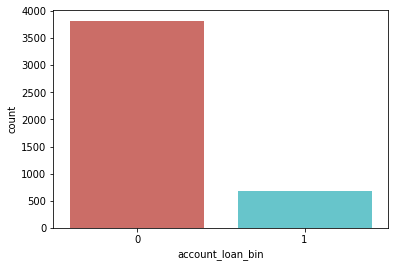

In [32]:
#Las clases a predecir (si la cuenta tiene prestamo=1 ó no tiene =0) están desbalanceadas
y2=pd.DataFrame(y)
sns.countplot(x="account_loan_bin",data=y2, palette='hls')
plt.show

In [33]:
y2['account_loan_bin'].value_counts()

0    3818
1     682
Name: account_loan_bin, dtype: int64

In [34]:
#Veamos el porcentaje que representa cada clase:
print("Las cuentas CON préstamo son el", "%.2f" % (y2['account_loan_bin'].value_counts()[0]/len(y2['account_loan_bin'])*100) ,"%")
print("Las cuentas SIN préstamo son el", "%.2f" % (y2['account_loan_bin'].value_counts()[1]/len(y2['account_loan_bin'])*100) ,"%")

Las cuentas CON préstamo son el 84.84 %
Las cuentas SIN préstamo son el 15.16 %


In [35]:
#Vamos a querer dibujar Decision Trees. Importamos los paquetes necesarios para dibujarlos
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [36]:
#Función para dibujar un árbol
def dibu_arb(tree):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,filled=True, rounded=True,
                special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(Image(graph.create_png()))
    

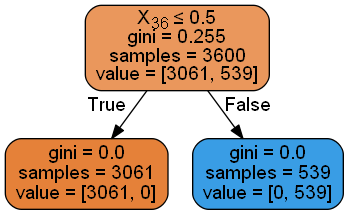

In [37]:
dibu_arb(clf_tree)

In [38]:
X_train.columns[36]
#Parece que la variable "Num_Sym_LoanPayment" contiene toda la información de "account_loan_bin", aunque se han extraido 
#de ficheros distintos. Pero por el nombre se puede intuir que es así. 

'Num_Sym_LoanPayment'

In [39]:
X.columns[clf_tree.feature_importances_>0.10] #Vamos a ver las variables más importantes para el modelo

Index(['Num_Sym_LoanPayment'], dtype='object')

In [40]:
clf_tree.feature_importances_
#'Num_Sym_LoanPayment' contiene toda la importancia

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
df_original[df_original['Num_Sym_LoanPayment']>0]['account_loan_bin'].value_counts()

1    682
Name: account_loan_bin, dtype: int64

In [42]:
#Link interesante para ver como se realiza el cálculo de "feature_importances"_
#https://medium.com/@srnghn/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

In [43]:
#conda install -c conda-forge imbalanced-learn

In [44]:
#Hemos tomado SMOTENC y no SMOTE para poder aplicar el algoritmo a variables categóricas
from imblearn.over_sampling import SMOTENC

In [45]:
#Para ver las columnas que vamos a denominar como categóricas cuando apliquemos SMOTE
print(X_train.columns)

Index(['Date_Account', 'birth_owner', 'birth_disponent', 'owner_card_date',
       'Ord_Insurance', 'Ord_Insurance_amount', 'Ord_Household_Payment',
       'Ord_Household_Payment_amount', 'Ord_Loan_Payment', 'Ord_Leasing',
       'Ord_Empty', 'Ord_Empty_amount', 'num_inhabitants', 'municip < 499',
       'municip 500-1999', 'municip 2000-9999', 'municip > 10000',
       'num_cities', 'avg_salary', 'Num_Type_Credit', 'Num_Type_VYBER',
       'Num_Type_Withdrawal', 'Num_Op_Null', 'Num_Op_Remittances',
       'Num_Op_Collection', 'Num_Op_CashCredit', 'Num_Op_WithdrawalCash',
       'Num_Op_WithdrawalCreditCard', 'Num_Sym_Null', 'Num_Sym_Null2',
       'Num_Sym_Pension', 'Num_Sym_Insurance', 'Num_Sym_NegBal',
       'Num_Sym_Household', 'Num_Sym_Statement', 'Num_Sym_IntDep',
       'Num_Sym_LoanPayment', 'Balance_in_negative', 'Ord_Loan_Payment_amount',
       'Ord_Leasing_amount', 'ratio_urban_inhabitants', 'unemployment_rate_95',
       'unemployment_rate_96', 'crimes_95_ratio', 'crimes_

In [46]:
X_train.shape

(3600, 59)

In [47]:
smo=SMOTENC(categorical_features=range(46,59),random_state=0)#Las variables categóricas van a ser de la 46 a la 59
os_X,os_y=smo.fit_sample(X_train, y_train)
columns = X_train.columns
os_X = pd.DataFrame(data=os_X,columns=columns)
os_y= pd.DataFrame(data=os_y,columns=['account_loan_bin'])

In [48]:
#Chequeamos que SMOTENC funciona como esperábamos

print("length of oversampled data is ",len(os_X))
print("Number of loans=0 in oversampled data",len(os_y[os_y['account_loan_bin']==0]))
print("Number of loans=1",len(os_y[os_y['account_loan_bin']==1]))
print("Proportion of loans=0 is ",len(os_y[os_y['account_loan_bin']==0])/len(os_X))
print("Proportion of loans=1 is ",len(os_y[os_y['account_loan_bin']==1])/len(os_X))

os_bin=os_X[['account_disponent_bin_0','account_disponent_bin_1',
       'frequency_After_trans', 'frequency_Monthly', 'frequency_Weekly',
       'sex_owner_F', 'sex_owner_M', 'owner_card_type_0', 'owner_card_type_1',
       'owner_card_type_2', 'owner_card_type_3', 'sex_disponent_F',
       'sex_disponent_M']]

print("unique de variables categóricas",unique(os_bin))
print("unique de variable y",unique(os_y))

length of oversampled data is  6122
Number of loans=0 in oversampled data 3061
Number of loans=1 3061
Proportion of loans=0 is  0.5
Proportion of loans=1 is  0.5
unique de variables categóricas [0. 1.]
unique de variable y [0 1]


In [49]:
os_clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_tree_os=os_clf_tree.fit(os_X,os_y)

In [50]:
eval_modelo(clf_tree_os,os_X,os_y, X_test, y_test)
#Obtenemos los mismos resultados con y sin SMOTE. Lógicamente porque estamos suponiendo que la variable 
#'Num_Sym_LoanPayment' contiene la información de si la cuenta tiene un préstamo o no

Datos de train:
El accuracy es 100.0 %
La precision es 100.0 %
El recall es 100.0 %
El F1 Score es 100.0 %
tn: 3061  fp: 0  fn: 0  tp: 3061
Datos de test:
El accuracy es 100.0 %
La precision es 100.0 %
El recall es 100.0 %
El F1 Score es 100.0 %
tn: 757  fp: 0  fn: 0  tp: 143


In [51]:
#Vemos que tener un préstamo correlaciona de forma muy significativa con las variables:Ord_Loan_Payment,Num_Sym_LoanPayment y 
#Ord_Loan_Payment_amount
df_original.corr()["account_loan_bin"]

Unnamed: 0                      0.003331
district_id                     0.003010
account_id                      0.555004
Date_Account                    0.015261
client_id_owner                 0.556641
client_id_disponent             0.666977
birth_owner                     0.104253
birth_disponent                 0.021728
loan_id                              NaN
Date_Loan                       1.000000
Amount_Loan                          NaN
Duration_Loan                        NaN
Payments_Loan                        NaN
Ord_Insurance                   0.064054
Ord_Insurance_amount            0.066203
Ord_Household_Payment          -0.115103
Ord_Household_Payment_amount    0.065080
Ord_Loan_Payment                0.970807
Ord_Loan_Payment_amount         0.831433
Ord_Leasing                    -0.121020
Ord_Leasing_amount             -0.105988
Ord_Empty                       0.076714
Ord_Empty_amount                0.098316
owner_card_type                 0.033378
disponent_card_t

In [52]:
#Vemos las correlaciones de las variables anteriores
print(np.corrcoef(df_original["account_loan_bin"],df_original["Ord_Loan_Payment"]))
print(np.corrcoef(df_original["account_loan_bin"],df_original["Ord_Loan_Payment_amount"]))
print(np.corrcoef(df_original["account_loan_bin"],df_original["Num_Sym_LoanPayment"]))

[[1.         0.97080682]
 [0.97080682 1.        ]]
[[1.         0.83143262]
 [0.83143262 1.        ]]
[[1.        0.8227983]
 [0.8227983 1.       ]]


In [53]:
#Vamos a ver qué resultados obtenemos con los modelos eliminando la variable 'Num_Sym_LoanPayment' (la que anteriormente había
#salido como más relevante). Generamos un nuevo DataFrame
X1=X.drop(['Num_Sym_LoanPayment'], axis=1)

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [55]:
X1_clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_treeX1=X1_clf_tree.fit(X1_train,y1_train)

In [56]:
#Aplicamos oversampling
smo=SMOTENC(categorical_features=range(45,58),random_state=0)# Modificamos rango porque hemos eliminado una variable
os_X1,os_y1=smo.fit_sample(X1_train, y1_train)
columns = X1_train.columns
os_X1 = pd.DataFrame(data=os_X1,columns=columns)
os_y1= pd.DataFrame(data=os_y1,columns=['account_loan_bin'])

In [57]:
osX1_clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_tree_osX1=osX1_clf_tree.fit(os_X1,os_y1)

In [58]:
#Evaluamos los modelos
print("Sin Oversampling")
eval_modelo(clf_treeX1,X1_train,y1_train, X1_test, y1_test)
print("Con Oversampling")
eval_modelo(clf_tree_osX1,os_X1,os_y1, X1_test, y1_test)

Sin Oversampling
Datos de train:
El accuracy es 99.33333333333333 %
La precision es 98.49340866290018 %
El recall es 97.03153988868274 %
El F1 Score es 97.7570093457944 %
tn: 3053  fp: 8  fn: 16  tp: 523
Datos de test:
El accuracy es 98.44444444444444 %
La precision es 96.40287769784173 %
El recall es 93.7062937062937 %
El F1 Score es 95.0354609929078 %
tn: 752  fp: 5  fn: 9  tp: 134
Con Oversampling
Datos de train:
El accuracy es 99.59163672002613 %
La precision es 99.54308093994779 %
El recall es 99.640640313623 %
El F1 Score es 99.59183673469387 %
tn: 3047  fp: 14  fn: 11  tp: 3050
Datos de test:
El accuracy es 99.11111111111111 %
La precision es 96.55172413793103 %
El recall es 97.9020979020979 %
El F1 Score es 97.22222222222221 %
tn: 752  fp: 5  fn: 3  tp: 140


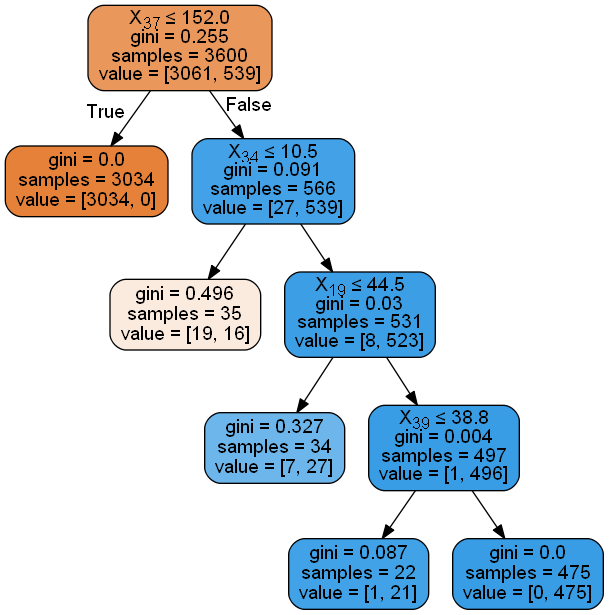

In [59]:
dibu_arb(clf_treeX1)

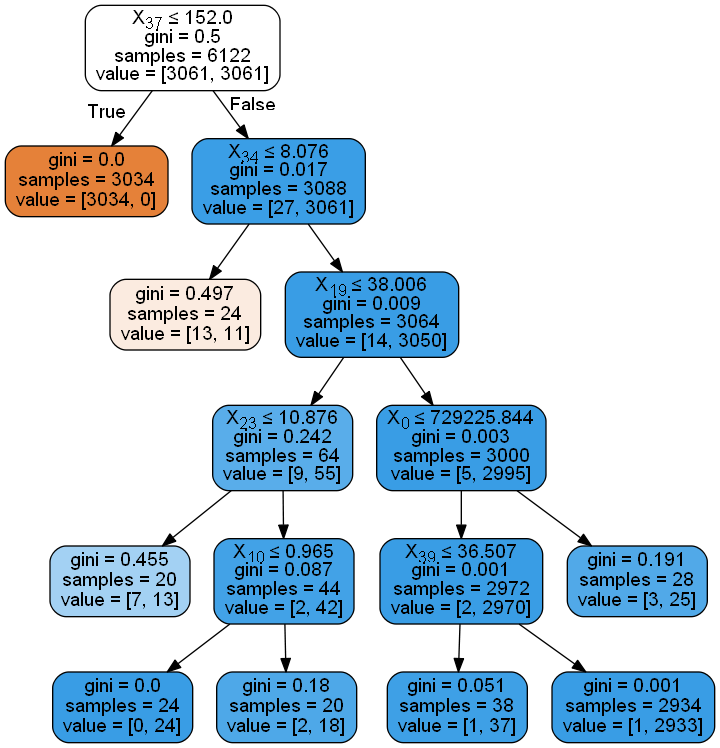

In [60]:
dibu_arb(clf_tree_osX1)

In [61]:
X1_train.columns[37]

'Ord_Loan_Payment_amount'

In [62]:
X1.columns[clf_tree_osX1.feature_importances_>0.10]

Index(['Ord_Loan_Payment_amount'], dtype='object')

In [63]:
X1.columns[clf_treeX1.feature_importances_>0.10]

Index(['Ord_Loan_Payment_amount'], dtype='object')

In [64]:
df_original[df_original['Ord_Loan_Payment_amount']>0]['account_loan_bin'].value_counts()

1    682
0     35
Name: account_loan_bin, dtype: int64

In [65]:
X2=X1.drop(['Ord_Loan_Payment_amount'], axis=1)

In [66]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [67]:
#Generamos el modelo SIN oversampling
X2_clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_treeX2=X2_clf_tree.fit(X2_train,y2_train)

In [68]:
#Aplicamos oversampling
smo=SMOTENC(categorical_features=range(44,57),random_state=0)# Modificamos rango porque hemos eliminado una nueva variable
os_X2,os_y2=smo.fit_sample(X2_train, y2_train)
columns = X2_train.columns
os_X2 = pd.DataFrame(data=os_X2,columns=columns)
os_y2= pd.DataFrame(data=os_y2,columns=['account_loan_bin'])

In [69]:
#Generamos el árbol con el DataFrame al hemos aplicado oversampling
osX2_clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_tree_osX2=osX2_clf_tree.fit(os_X2,os_y2)

In [70]:
#Evaluamos los modelos
print("Sin Oversampling")
eval_modelo(clf_treeX2,X2_train,y2_train, X2_test, y2_test)
print("Con Oversampling")
eval_modelo(clf_tree_osX2,os_X2,os_y2, X2_test, y2_test)

Sin Oversampling
Datos de train:
El accuracy es 99.33333333333333 %
La precision es 98.49340866290018 %
El recall es 97.03153988868274 %
El F1 Score es 97.7570093457944 %
tn: 3053  fp: 8  fn: 16  tp: 523
Datos de test:
El accuracy es 98.44444444444444 %
La precision es 96.40287769784173 %
El recall es 93.7062937062937 %
El F1 Score es 95.0354609929078 %
tn: 752  fp: 5  fn: 9  tp: 134
Con Oversampling
Datos de train:
El accuracy es 99.6079712512251 %
La precision es 99.54323001631322 %
El recall es 99.67330937602091 %
El F1 Score es 99.60822722820764 %
tn: 3047  fp: 14  fn: 10  tp: 3051
Datos de test:
El accuracy es 99.11111111111111 %
La precision es 96.55172413793103 %
El recall es 97.9020979020979 %
El F1 Score es 97.22222222222221 %
tn: 752  fp: 5  fn: 3  tp: 140


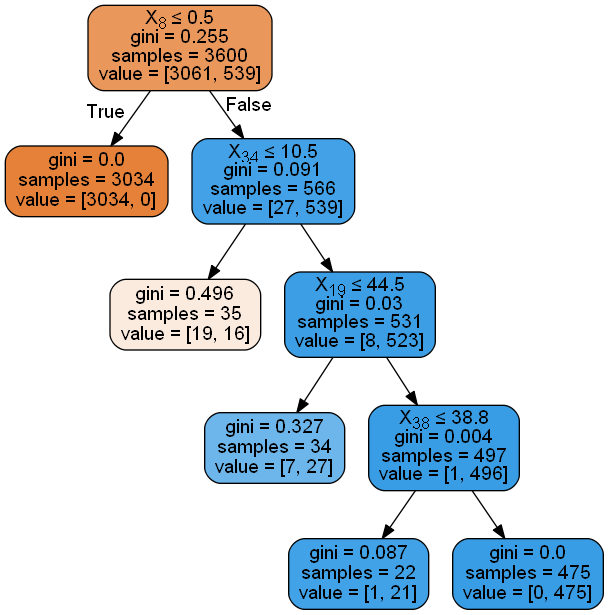

In [71]:
dibu_arb(clf_treeX2)

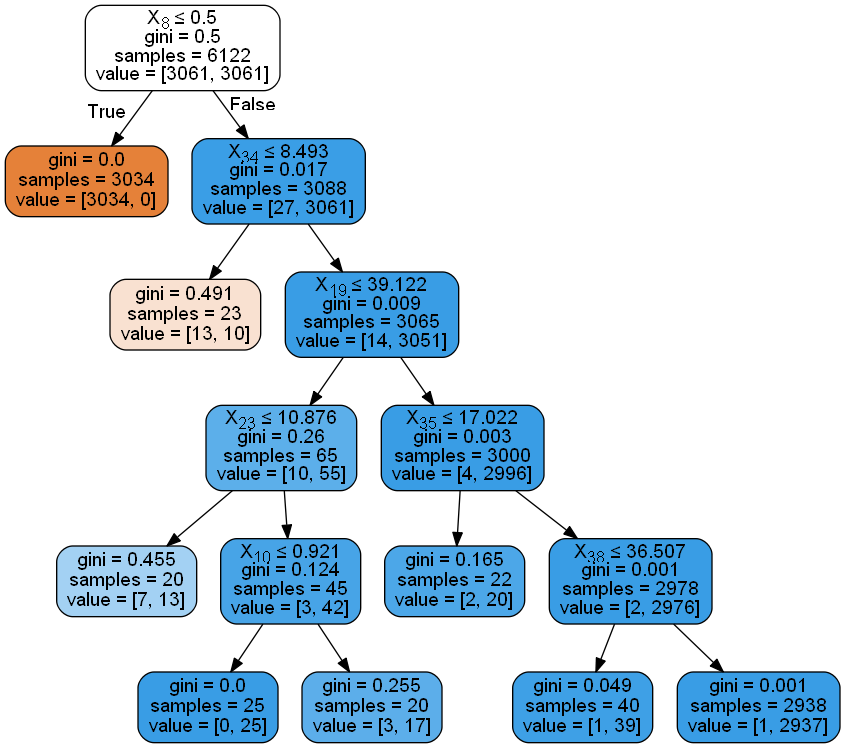

In [72]:
dibu_arb(clf_tree_osX2)

In [73]:
X2_train.columns[8]

'Ord_Loan_Payment'

In [74]:
X2.columns[clf_treeX2.feature_importances_>0.10]

Index(['Ord_Loan_Payment'], dtype='object')

In [75]:
X2.columns[clf_tree_osX2.feature_importances_>0.10]

Index(['Ord_Loan_Payment'], dtype='object')

In [76]:
df_original[df_original['Ord_Loan_Payment']>0]['account_loan_bin'].value_counts()

1    682
0     35
Name: account_loan_bin, dtype: int64

In [77]:
#Generamos el conjunto X3, a partir de X2, eliminando la variable 'Ord_Loan_Payment'
X3=X2.drop(['Ord_Loan_Payment'], axis=1)

In [78]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=0)

In [79]:
#Generamos el modelo SIN oversampling
X3_clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_treeX3=X3_clf_tree.fit(X3_train,y3_train)

In [80]:
#Aplicamos oversampling
smo=SMOTENC(categorical_features=range(43,56),random_state=0)# Modificamos rango porque hemos eliminado una nueva variable
os_X3,os_y3=smo.fit_sample(X3_train, y3_train)
columns = X3_train.columns
os_X3 = pd.DataFrame(data=os_X3,columns=columns)
os_y3= pd.DataFrame(data=os_y3,columns=['account_loan_bin'])

In [81]:
#Generamos el modelo CON oversampling
osX3_clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=5,random_state=0)
clf_tree_osX3=osX3_clf_tree.fit(os_X3,os_y3)

In [82]:
#Evaluamos los modelos
print("Sin Oversampling")
eval_modelo(clf_treeX3,X3_train,y3_train, X3_test, y3_test)
print("Con Oversampling")
eval_modelo(clf_tree_osX3,os_X3,os_y3, X3_test, y3_test)

Sin Oversampling
Datos de train:
El accuracy es 88.08333333333334 %
La precision es 71.82539682539682 %
El recall es 33.58070500927644 %
El F1 Score es 45.76485461441214 %
tn: 2990  fp: 71  fn: 358  tp: 181
Datos de test:
El accuracy es 83.44444444444444 %
La precision es 45.0 %
El recall es 18.88111888111888 %
El F1 Score es 26.60098522167488 %
tn: 724  fp: 33  fn: 116  tp: 27
Con Oversampling
Datos de train:
El accuracy es 89.74191440705653 %
La precision es 89.87217305801377 %
El recall es 89.57856909506697 %
El F1 Score es 89.72513089005236 %
tn: 2752  fp: 309  fn: 319  tp: 2742
Datos de test:
El accuracy es 83.0 %
La precision es 47.19101123595505 %
El recall es 58.74125874125874 %
El F1 Score es 52.33644859813084 %
tn: 663  fp: 94  fn: 59  tp: 84


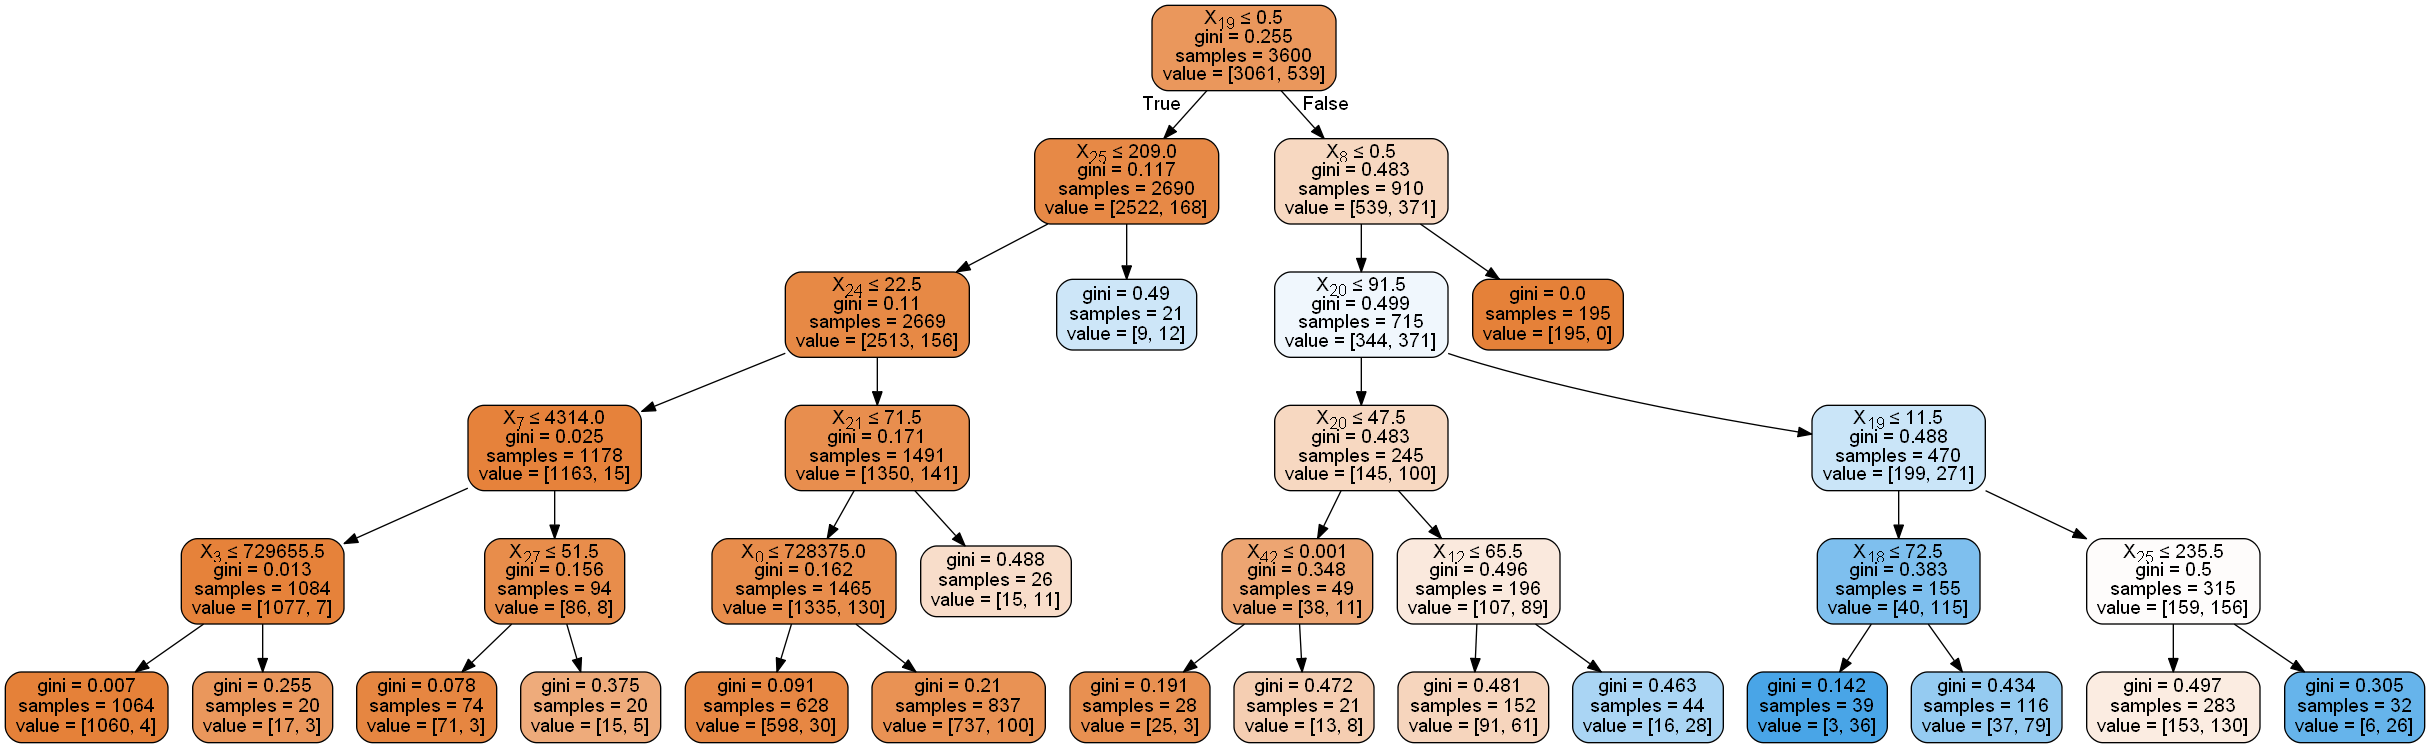

In [83]:
dibu_arb(clf_treeX3)

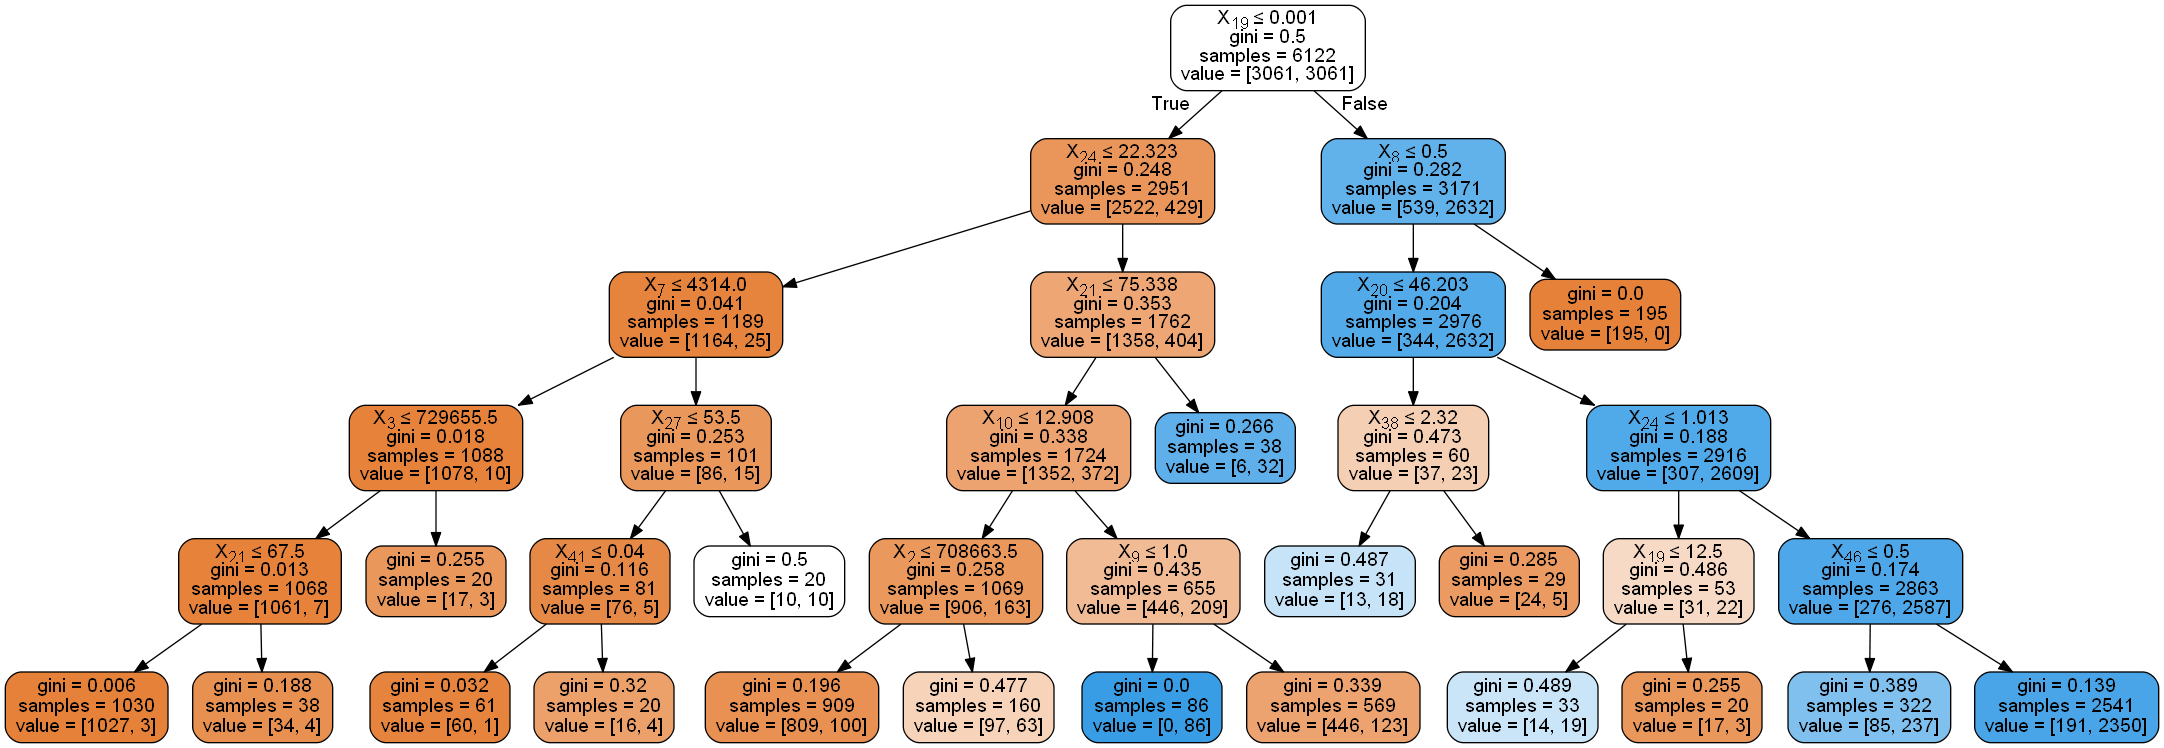

In [84]:
dibu_arb(clf_tree_osX3)

In [85]:
print(X3_train.columns[19])#Número de un tipo especial de reintegros
print(X3_train.columns[25])#Número de retiradas de efectivo en cash
print(X3_train.columns[8])#Número de Órdenes de Leasing
print(X3_train.columns[24])#Número ingresos en cash

Num_Type_VYBER
Num_Op_WithdrawalCash
Ord_Leasing
Num_Op_CashCredit


In [86]:
X3.columns[clf_treeX3.feature_importances_>0.10]

Index(['Ord_Leasing', 'Num_Type_VYBER'], dtype='object')

In [87]:
X3.columns[clf_tree_osX3.feature_importances_>0.10]

Index(['Ord_Leasing', 'Num_Type_VYBER'], dtype='object')

In [88]:
clf_treeX3.feature_importances_

array([0.01156053, 0.        , 0.        , 0.00263103, 0.        ,
       0.        , 0.        , 0.00335308, 0.25851345, 0.        ,
       0.        , 0.        , 0.01181411, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01071574, 0.54752094,
       0.04158172, 0.01789606, 0.        , 0.        , 0.02761783,
       0.05682854, 0.        , 0.00432894, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00563802, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [89]:
sum(clf_treeX3.feature_importances_)

1.0

In [90]:
print(df_original.corr()["account_loan_bin"])

Unnamed: 0                      0.003331
district_id                     0.003010
account_id                      0.555004
Date_Account                    0.015261
client_id_owner                 0.556641
client_id_disponent             0.666977
birth_owner                     0.104253
birth_disponent                 0.021728
loan_id                              NaN
Date_Loan                       1.000000
Amount_Loan                          NaN
Duration_Loan                        NaN
Payments_Loan                        NaN
Ord_Insurance                   0.064054
Ord_Insurance_amount            0.066203
Ord_Household_Payment          -0.115103
Ord_Household_Payment_amount    0.065080
Ord_Loan_Payment                0.970807
Ord_Loan_Payment_amount         0.831433
Ord_Leasing                    -0.121020
Ord_Leasing_amount             -0.105988
Ord_Empty                       0.076714
Ord_Empty_amount                0.098316
owner_card_type                 0.033378
disponent_card_t

In [91]:
df_original[df_original['Num_Type_VYBER']>0]['account_loan_bin'].value_counts()

0    681
1    463
Name: account_loan_bin, dtype: int64

In [92]:
df_original[df_original['Ord_Leasing']>0]['account_loan_bin'].value_counts()

0    341
Name: account_loan_bin, dtype: int64

# Trabajamos a continuación sobre las variables con las que nos hemos quedado en el DataFrame X3

# Análisis antes de feature engineering

In [93]:
# El conjunto de datos antes de trabajar feature engineering
X=X3
X_train=X3_train
X_test=X3_test
y_train=y3_train
y_test=y3_test

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [95]:
#Vamos a definir la parrilla para realizar Grid Search

# Máximo número de niveles en el árbol. Damos una distribución con mayor probabilidad en valores pequeños
max_depth1 = [int(x) for x in np.linspace(2, 20, num = 10)]#"Sobreponderamos" árboles con poca profundidad
max_depth2 =[int(x) for x in np.linspace(30, 100, num = 4)]
max_depth=max_depth1 + max_depth2

# Mínimo número de observaciones en cada hoja. Damos una distribución con mayor probabilidad en los valores más elevados
min_samples_leaf = [int(x) for x in np.linspace(5, 100, num = 5)]

# Hemos asignado mayor número de casos a los parámetros que podrían facilitar la explicabilidad del Decision Tree  

In [96]:
# Creamos la grid aleatoria
grid = {'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf
               }

In [97]:
grid

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 53, 76, 100],
 'min_samples_leaf': [5, 28, 52, 76, 100]}

In [98]:
#Creamos el modelos para hacer la búsqueda de hiperparámetros 
clf_tree = DecisionTreeClassifier(random_state=0)
#Creamos una versión para optimizar el F1 Score
clf_tree_gridsearch_f1= GridSearchCV(estimator = clf_tree, param_grid = grid, cv=5, scoring="f1")

In [99]:
#Vemos ahora los resultados con la optimización realizada sobre F1 Score

clf_tree_gridsearch_f1.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",clf_tree_gridsearch_f1.best_params_)

clf_tree_gs_f1_a = clf_tree_gridsearch_f1.best_estimator_

resultados_a=eval_modelo (clf_tree_gs_f1_a,X_train,y_train, X_test,y_test)

tuned hpyerparameters :(best parameters)  {'max_depth': 2, 'min_samples_leaf': 5}
Datos de train:
El accuracy es 85.91666666666666 %
La precision es 52.17983651226158 %
El recall es 71.05751391465677 %
El F1 Score es 60.172820109976435 %
tn: 2710  fp: 351  fn: 156  tp: 383
Datos de test:
El accuracy es 83.0 %
La precision es 47.5 %
El recall es 66.43356643356644 %
El F1 Score es 55.39358600583091 %
tn: 652  fp: 105  fn: 48  tp: 95


In [100]:
X.columns[clf_tree_gs_f1_a.feature_importances_>0.10]

Index(['Num_Type_VYBER', 'Ord_Leasing_amount'], dtype='object')

In [101]:
#Pruebo si un 'min_samples_leaf' tan bajo puede estar produciendo overfitting.
prueba = DecisionTreeClassifier(random_state=0, max_depth=2,min_samples_leaf=150)#Incrementamos 'min_samples_leaf'

prueba.fit(X_train,y_train)
eval_modelo(prueba,X_train,y_train,X_test,y_test)
#No parece este parámetro esté generando overfitting

Datos de train:
El accuracy es 85.77777777777777 %
La precision es 51.88811188811189 %
El recall es 68.83116883116884 %
El F1 Score es 59.170653907496 %
tn: 2717  fp: 344  fn: 168  tp: 371
Datos de test:
El accuracy es 82.88888888888889 %
La precision es 47.179487179487175 %
El recall es 64.33566433566433 %
El F1 Score es 54.4378698224852 %
tn: 654  fp: 103  fn: 51  tp: 92


# Análisis con Oversampling

In [102]:
# El conjunto de datos con Oversampling 
os_X_train=os_X3
os_y_train=os_y3
os_X_test=X_test
os_y_test=y_test

In [103]:
#Creamos el modelos para hacer la búsqueda de hiperparámetros 
clf_tree = DecisionTreeClassifier(random_state=0)
#Creamos una versión para optimizar el F1 Score
clf_tree_gridsearch_f1= GridSearchCV(estimator = clf_tree, param_grid = grid, cv=5, scoring="f1")

In [104]:
#Vemos ahora los resultados con la optimización realizada sobre F1 Score

clf_tree_gridsearch_f1.fit(os_X_train, os_y_train)

print("tuned hpyerparameters :(best parameters) ",clf_tree_gridsearch_f1.best_params_)

clf_tree_gs_f1_os = clf_tree_gridsearch_f1.best_estimator_

resultados_os=eval_modelo (clf_tree_gs_f1_os,os_X_train, os_y_train, os_X_test,os_y_test)

tuned hpyerparameters :(best parameters)  {'max_depth': 6, 'min_samples_leaf': 28}
Datos de train:
El accuracy es 89.6765762822607 %
La precision es 91.18345201763309 %
El recall es 87.84710878797779 %
El F1 Score es 89.48419301164726 %
tn: 2801  fp: 260  fn: 372  tp: 2689
Datos de test:
El accuracy es 83.0 %
La precision es 46.835443037974684 %
El recall es 51.74825174825175 %
El F1 Score es 49.16943521594684 %
tn: 673  fp: 84  fn: 69  tp: 74


In [105]:
#Vamos a probar con los parámetros del mejor modelo que hemos obtenido hasta el momento en test: max_depth=2 y min_samples_leaf=5
prueba_os = DecisionTreeClassifier(random_state=0, max_depth=2,min_samples_leaf=5)

In [106]:
prueba_os.fit(os_X_train, os_y_train)
eval_modelo (prueba_os,os_X_train, os_y_train, os_X_test,os_y_test)

Datos de train:
El accuracy es 87.3734073832081 %
La precision es 88.44086021505376 %
El recall es 85.98497223129696 %
El F1 Score es 87.19562696703662 %
tn: 2717  fp: 344  fn: 429  tp: 2632
Datos de test:
El accuracy es 82.88888888888889 %
La precision es 47.179487179487175 %
El recall es 64.33566433566433 %
El F1 Score es 54.4378698224852 %
tn: 654  fp: 103  fn: 51  tp: 92


In [107]:
os_X_train.columns[prueba_os.feature_importances_>0.10]

Index(['Num_Type_VYBER', 'Ord_Leasing_amount'], dtype='object')

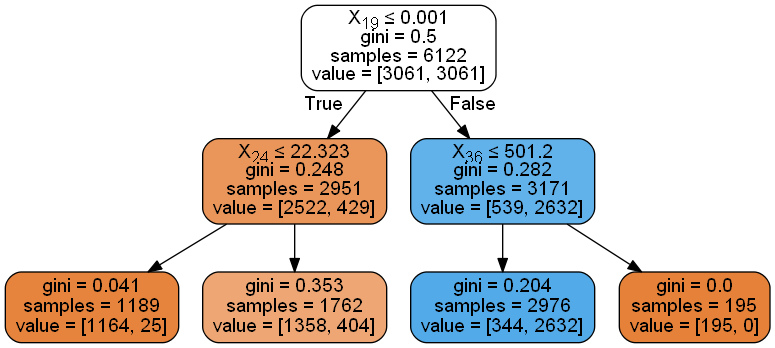

In [108]:
dibu_arb(prueba_os)

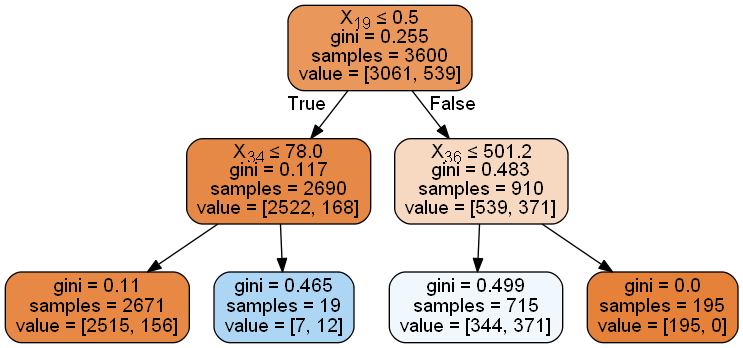

In [109]:
dibu_arb(clf_tree_gs_f1_a)

# Análisis aplicando Log a variables numéricas y Robust Scaling

In [110]:
#Separamos las variables numéricas de las que consideramos categóricas
X_cat=X[['account_disponent_bin_0','account_disponent_bin_1',
       'frequency_After_trans', 'frequency_Monthly', 'frequency_Weekly',
       'sex_owner_F', 'sex_owner_M', 'owner_card_type_0', 'owner_card_type_1',
       'owner_card_type_2', 'owner_card_type_3', 'sex_disponent_F',
       'sex_disponent_M']]
X_num=X[['Date_Account', 'birth_owner', 'birth_disponent', 'owner_card_date',
       'Ord_Insurance', 'Ord_Insurance_amount', 'Ord_Household_Payment',
       'Ord_Household_Payment_amount', 'Ord_Leasing', 'Ord_Empty',
       'Ord_Empty_amount', 'num_inhabitants', 'municip < 499',
       'municip 500-1999', 'municip 2000-9999', 'municip > 10000',
       'num_cities', 'avg_salary', 'Num_Type_Credit', 'Num_Type_VYBER',
       'Num_Type_Withdrawal', 'Num_Op_Null', 'Num_Op_Remittances',
       'Num_Op_Collection', 'Num_Op_CashCredit', 'Num_Op_WithdrawalCash',
       'Num_Op_WithdrawalCreditCard', 'Num_Sym_Null', 'Num_Sym_Null2',
       'Num_Sym_Pension', 'Num_Sym_Insurance', 'Num_Sym_NegBal',
       'Num_Sym_Household', 'Num_Sym_Statement', 'Num_Sym_IntDep',
       'Balance_in_negative', 'Ord_Leasing_amount', 'ratio_urban_inhabitants',
       'unemployment_rate_95', 'unemployment_rate_96', 'crimes_95_ratio',
       'crimes_96_ratio', 'entrepreneurs_ratio']]

In [111]:
#Creamos un DataFrame que contenga el log natural de las variables numéricas
cols = X_num.columns
ln_scl_X_num=pd.DataFrame(X_num,columns=cols)

In [112]:
#Calculamos el logaritmo de las variables que consideramos numéricas
cols=X_num.columns
for col in cols:
    ln_scl_X_num[col]=ln_scl_X_num[col]+1.1 #Para evitar negativos al aplicar el logaritmo añadimos 1.1 (las variables son >=0)
    ln_scl_X_num[col]=np.log(ln_scl_X_num[col])

In [113]:
ln_scl_X_num=pd.DataFrame(ln_scl_X_num,columns=cols)

In [114]:
#Ahora vamos a aplicar Robust Scaling
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
columns =ln_scl_X_num.columns
rbs_scale = rbs.fit_transform(ln_scl_X_num)
ln_scl_X_num=pd.DataFrame(rbs_scale,columns=columns)

In [115]:
#Creamos un DataFrame a partir de la transformación de las variables numéricas y dejando las categóricas igual.
ln_scl_X= pd.concat([ln_scl_X_num,X_cat], axis = 1)

In [116]:
ln_scl_X_train, ln_scl_X_test, ln_scl_y_train, ln_scl_y_test = train_test_split(ln_scl_X, y, test_size=0.2, random_state=0)

In [117]:
#Creamos el modelos para hacer la búsqueda de hiperparámetros 
clf_tree = DecisionTreeClassifier(random_state=0)
#Creamos una versión para optimizar el F1 Score
clf_tree_gridsearch_f1= GridSearchCV(estimator = clf_tree, param_grid = grid, cv=5, scoring="f1")

In [118]:
#Vemos ahora los resultados con la optimización realizada sobre F1 Score

clf_tree_gridsearch_f1.fit(ln_scl_X_train,ln_scl_y_train)

print("tuned hpyerparameters :(best parameters) ",clf_tree_gridsearch_f1.best_params_)

clf_tree_gs_f1_ln_scl = clf_tree_gridsearch_f1.best_estimator_

resultados_ln_scl=eval_modelo (clf_tree_gs_f1_ln_scl,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

tuned hpyerparameters :(best parameters)  {'max_depth': 2, 'min_samples_leaf': 5}
Datos de train:
El accuracy es 85.91666666666666 %
La precision es 52.17983651226158 %
El recall es 71.05751391465677 %
El F1 Score es 60.172820109976435 %
tn: 2710  fp: 351  fn: 156  tp: 383
Datos de test:
El accuracy es 83.0 %
La precision es 47.5 %
El recall es 66.43356643356644 %
El F1 Score es 55.39358600583091 %
tn: 652  fp: 105  fn: 48  tp: 95


In [119]:
ln_scl_X.columns[clf_tree_gs_f1_ln_scl.feature_importances_>0.1]

Index(['Num_Type_VYBER', 'Ord_Leasing_amount'], dtype='object')

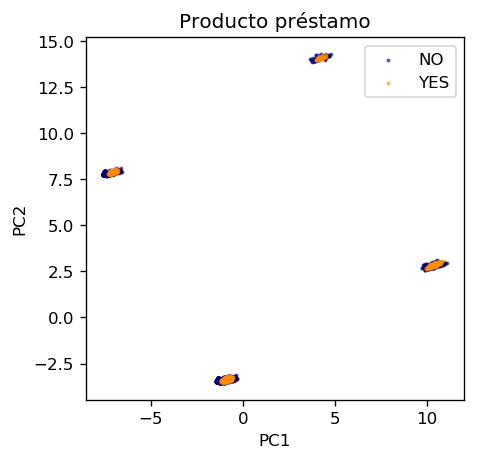

In [120]:
#Vamos a probar si con el feature engineeing, cuando hacemos PCA podemos obtener una representación simple de los datos. 
#Sé que va a ser difícil obtener una representación tan sencilla del Data Frame pero lo probamos.
pca = PCA(n_components=2).fit_transform(ln_scl_X)
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='NO', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='YES', s=2, color='darkorange')
plt.legend()
plt.title('Producto préstamo')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [121]:
#Del gráfico anterior no consigo sacar nada en claro, no es posible discriminar las cuentas que han contratado préstamo 
#de las que no lo han contratado
pca2 = PCA(n_components=2)
pca2.fit(ln_scl_X)
print(pca2.components_)
print(pca2.explained_variance_ratio_)

[[-9.29422654e-04  2.42943557e-02 -4.75759891e-01  8.58674026e-01
  -2.75128248e-04 -2.42284294e-03 -1.54422062e-02 -1.13765333e-02
   2.53941040e-03  8.43507305e-04  1.66208984e-03  1.80881077e-03
   8.21996085e-04 -2.94438891e-03 -1.90827106e-03 -3.23301812e-03
  -9.79496443e-04  3.79659207e-03  7.73152027e-03  6.00961706e-02
   7.09356168e-03  8.06448021e-03 -1.16139289e-02 -2.12690136e-02
   2.22458763e-02  1.20874283e-02  1.17913007e-01  2.72112740e-02
  -1.10266311e-03 -6.21747763e-02  2.63478624e-04  1.53180800e-03
  -8.84807083e-03  4.62732857e-03  8.06448021e-03  2.06776937e-03
   3.02657411e-02  1.88102306e-03 -2.44301210e-03 -2.07308434e-03
   3.46522000e-03  4.14066186e-03  5.72479108e-04  3.73662785e-02
  -3.73662785e-02  5.46005332e-04 -2.92262695e-03  2.37662162e-03
  -1.72133804e-03  1.72133804e-03 -6.73053918e-02  4.94583636e-02
   6.51781614e-03  1.13292121e-02 -1.88186030e-02 -1.85476754e-02]
 [-1.91420886e-03 -3.87846405e-03  8.69354342e-01  4.74426553e-01
   5.5491

In [122]:
#Creamos el modelos para hacer la búsqueda de hiperparámetros con optimización de Precision
clf_tree = DecisionTreeClassifier(random_state=0)
#Creamos una versión para optimizar el F1 Score
clf_tree_gridsearch_f1= GridSearchCV(estimator = clf_tree, param_grid = grid, cv=5, scoring="precision")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score

clf_tree_gridsearch_f1.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",clf_tree_gridsearch_f1.best_params_)

clf_tree_gs_f1_p = clf_tree_gridsearch_f1.best_estimator_

resultados_p=eval_modelo (clf_tree_gs_f1_p,X_train,y_train, X_test,y_test)

tuned hpyerparameters :(best parameters)  {'max_depth': 6, 'min_samples_leaf': 100}
Datos de train:
El accuracy es 88.22222222222223 %
La precision es 65.58265582655827 %
El recall es 44.89795918367347 %
El F1 Score es 53.303964757709245 %
tn: 2934  fp: 127  fn: 297  tp: 242
Datos de test:
El accuracy es 83.11111111111111 %
La precision es 44.9438202247191 %
El recall es 27.972027972027973 %
El F1 Score es 34.48275862068966 %
tn: 708  fp: 49  fn: 103  tp: 40


In [123]:
X.columns[clf_tree_gs_f1_p.feature_importances_>0.10]

Index(['Num_Type_VYBER', 'Ord_Leasing_amount'], dtype='object')

# Vamos a probar con Support Vector Machines

In [124]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [125]:
#Vamos a hacer un GridSearch con kernel LINEAR y el conjunto de datos aplicado el LN y escalados
grid_SVM = {'C': [0.1,1,5,10], 
        'gamma':['scale','auto'],'max_iter': [1000,10000,100000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="linear")

#Vamos a optimizar el F1 Score 
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(ln_scl_X_train,ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_a = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_a,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-pac

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\sit

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


tuned hyperparameters :(best parameters)  {'C': 5, 'gamma': 'scale', 'max_iter': 100000}
Datos de train:
El accuracy es 88.13888888888889 %
La precision es 64.73684210526316 %
El recall es 45.640074211502785 %
El F1 Score es 53.53645266594123 %
tn: 2927  fp: 134  fn: 293  tp: 246
Datos de test:
El accuracy es 85.44444444444444 %
La precision es 56.00000000000001 %
El recall es 39.16083916083916 %
El F1 Score es 46.090534979423865 %
tn: 713  fp: 44  fn: 87  tp: 56


In [126]:
#Veamos si un mayor número de iteraciones mejora los resultados
clf_SVM = SVC(kernel="linear",C=5,gamma='scale',max_iter=1000000, random_state=0)
clf_SVM.fit(ln_scl_X_train,ln_scl_y_train)
eval_modelo (clf_SVM,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

Datos de train:
El accuracy es 88.1111111111111 %
La precision es 64.64379947229551 %
El recall es 45.45454545454545 %
El F1 Score es 53.376906318082796 %
tn: 2927  fp: 134  fn: 294  tp: 245
Datos de test:
El accuracy es 85.44444444444444 %
La precision es 55.88235294117647 %
El recall es 39.86013986013986 %
El F1 Score es 46.53061224489796 %
tn: 712  fp: 45  fn: 86  tp: 57


In [127]:
estimator = clf_SVM
selector = RFE(estimator, 3, step=1)
selector = selector.fit(ln_scl_X_train,ln_scl_y_train)
selector.support_ 
selector.ranking_

array([ 1, 37, 45, 54, 19, 51,  5,  9, 40, 23, 10, 29, 30, 32, 39, 50, 43,
       28, 15, 16,  6,  1,  4, 27,  8, 41, 26,  3, 14, 24, 20, 44,  7,  2,
        1, 18, 11, 31, 12, 13, 34, 35, 49, 48, 47, 42, 36, 22, 33, 46, 52,
       25, 17, 38, 21, 53])

In [128]:
ln_scl_X_train.columns[selector.support_]

Index(['Date_Account', 'Num_Op_Null', 'Num_Sym_IntDep'], dtype='object')

In [129]:
estimator = clf_SVM_gs_f1_a
selector = RFE(estimator, 3, step=1)
selector = selector.fit(ln_scl_X_train,ln_scl_y_train)
selector.support_ 
selector.ranking_

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\sit

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([ 1, 36, 45, 53, 18, 50,  5,  9, 40, 25, 10, 28, 29, 31, 38, 48, 44,
       27, 15, 16,  6,  1,  4, 21,  8, 43, 23,  3, 14, 26, 19, 41,  7,  2,
        1, 17, 11, 30, 12, 13, 34, 35, 51, 49, 52, 42, 32, 24, 46, 33, 54,
       22, 39, 37, 20, 47])

In [130]:
X.columns[selector.support_]

Index(['Date_Account', 'Num_Op_Null', 'Num_Sym_IntDep'], dtype='object')

In [131]:
#Probamos con min-max scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [132]:
columns = X_num.columns
X_scale = minmax.fit_transform(X_num)
X_scale=pd.DataFrame(X_scale,columns=columns)
X_scale_minmax = pd.concat([X_scale,X_cat], axis = 1)
X_scale_minmax.shape

(4500, 56)

In [133]:
X_scale_minmax_train, X_scale_minmax_test, y_train, y_test = train_test_split(X_scale_minmax, y, test_size=0.2, random_state=0)

In [134]:
#Vamos a hacer un GridSearch con kernel LINEAR y aplicando MinMax Scaling
grid_SVM = {'C': [0.1,1,5,10], 
        'gamma':['scale','auto'],'max_iter': [1000,10000,100000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="linear")

#Vamos a optimizar el F1 Score 
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(X_scale_minmax_train,y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_b = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_b,X_scale_minmax_train,y_train,X_scale_minmax_test,y_test)


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classif

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:11

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-pack

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-pac

tuned hyperparameters :(best parameters)  {'C': 10, 'gamma': 'scale', 'max_iter': 10000}
Datos de train:
El accuracy es 88.13888888888889 %
La precision es 64.35897435897436 %
El recall es 46.567717996289424 %
El F1 Score es 54.03659849300324 %
tn: 2922  fp: 139  fn: 288  tp: 251
Datos de test:
El accuracy es 85.11111111111111 %
La precision es 54.54545454545454 %
El recall es 37.76223776223776 %
El F1 Score es 44.62809917355372 %
tn: 712  fp: 45  fn: 89  tp: 54


In [135]:
#Probamos con el Robust Scaling
columns = X_num.columns
X_scale = rbs.fit_transform(X_num)
X_scale=pd.DataFrame(X_scale,columns=columns)
X_scale_rbs = pd.concat([X_scale,X_cat], axis = 1)
X_scale_rbs.shape

X_scale_rbs_train, X_scale_rbs_test, y_train, y_test = train_test_split(X_scale_rbs, y, test_size=0.2, random_state=0)

In [136]:
#Vamos a hacer un GridSearch con kernel LINEAR y aplicando Robust Scaling
grid_SVM = {'C': [0.1,1,5,10], 
        'gamma':['scale','auto'],'max_iter': [1000,10000,100000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="linear")

#Vamos a optimizar el F1 Score 
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(X_scale_rbs_train,y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_d = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_d,X_scale_rbs_train,y_train,X_scale_rbs_test,y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-pac

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\sit

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


tuned hyperparameters :(best parameters)  {'C': 5, 'gamma': 'scale', 'max_iter': 100000}
Datos de train:
El accuracy es 88.13888888888889 %
La precision es 64.73684210526316 %
El recall es 45.640074211502785 %
El F1 Score es 53.53645266594123 %
tn: 2927  fp: 134  fn: 293  tp: 246
Datos de test:
El accuracy es 85.44444444444444 %
La precision es 56.00000000000001 %
El recall es 39.16083916083916 %
El F1 Score es 46.090534979423865 %
tn: 713  fp: 44  fn: 87  tp: 56


In [137]:
#Vamos a hacer un GridSearch con kernel LINEAR y aplicando Robust Scaling
grid_SVM = {'C': [0.1,1,5,10], 
        'gamma':['scale','auto'],'max_iter': [1000,10000,100000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="linear")

#Vamos a optimizar el F1 Score 
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="precision")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(X_scale_rbs_train,y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_d = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_d,X_scale_rbs_train,y_train,X_scale_rbs_test,y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-pac

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\sit

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


tuned hyperparameters :(best parameters)  {'C': 5, 'gamma': 'scale', 'max_iter': 100000}
Datos de train:
El accuracy es 88.13888888888889 %
La precision es 64.73684210526316 %
El recall es 45.640074211502785 %
El F1 Score es 53.53645266594123 %
tn: 2927  fp: 134  fn: 293  tp: 246
Datos de test:
El accuracy es 85.44444444444444 %
La precision es 56.00000000000001 %
El recall es 39.16083916083916 %
El F1 Score es 46.090534979423865 %
tn: 713  fp: 44  fn: 87  tp: 56


# Seguimos con SVC pero cambiamos al Kernel RBF

In [138]:
#Vamos a hacer un GridSearch con kernel RBF y con el conjunto de datos aplicado el LN y escalados
grid_SVM = {'C': [0.1,1,5,10], 
        'gamma':['scale','auto'],'max_iter': [1000,10000,100000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="rbf")

#Creamos una versión para optimizar el F1 Score
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(ln_scl_X_train,ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_e = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_e,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classif

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: Convergence

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

tuned hyperparameters :(best parameters)  {'C': 10, 'gamma': 'scale', 'max_iter': 10000}
Datos de train:
El accuracy es 92.27777777777779 %
La precision es 85.75342465753425 %
El recall es 58.070500927643785 %
El F1 Score es 69.24778761061947 %
tn: 3009  fp: 52  fn: 226  tp: 313
Datos de test:
El accuracy es 86.33333333333333 %
La precision es 61.36363636363637 %
El recall es 37.76223776223776 %
El F1 Score es 46.75324675324675 %
tn: 723  fp: 34  fn: 89  tp: 54


In [139]:
#Vamos a hacer un GridSearch optimizando precision con kernel RBF y con el conjunto de datos aplicado el LN y escalados
grid_SVM = {'C': [0.1,1,5,10], 
        'gamma':['scale','auto'],'max_iter': [1000,10000,100000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="rbf")

#Creamos una versión para optimizar el F1 Score
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="precision")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(ln_scl_X_train,ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_e = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_e,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\cla

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: Conve

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

tuned hyperparameters :(best parameters)  {'C': 10, 'gamma': 'scale', 'max_iter': 10000}
Datos de train:
El accuracy es 92.27777777777779 %
La precision es 85.75342465753425 %
El recall es 58.070500927643785 %
El F1 Score es 69.24778761061947 %
tn: 3009  fp: 52  fn: 226  tp: 313
Datos de test:
El accuracy es 86.33333333333333 %
La precision es 61.36363636363637 %
El recall es 37.76223776223776 %
El F1 Score es 46.75324675324675 %
tn: 723  fp: 34  fn: 89  tp: 54


In [140]:
#Vamos a hacer un GridSearch variando, a partir de los resultados anteriores, la regularización y el número de iteraciones
#para ver si controlamos el overfitting
grid_SVM = {'C': [10,15,20,25,30,35,40,45,50], 
        'max_iter': [2000,5000,10000,20000,50000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="rbf", gamma='scale')

#Creamos una versión para optimizar el F1 Score
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(ln_scl_X_train,ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_f = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_f,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packa

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packag

tuned hyperparameters :(best parameters)  {'C': 40, 'max_iter': 2000}
Datos de train:
El accuracy es 94.88888888888889 %
La precision es 92.56594724220624 %
El recall es 71.61410018552876 %
El F1 Score es 80.75313807531381 %
tn: 3030  fp: 31  fn: 153  tp: 386
Datos de test:
El accuracy es 85.88888888888889 %
La precision es 58.51063829787234 %
El recall es 38.46153846153847 %
El F1 Score es 46.41350210970464 %
tn: 718  fp: 39  fn: 88  tp: 55


In [141]:
os_y_test=pd.DataFrame(os_y_test)

In [142]:
#Vamos a hacer un GridSearch con kernel LINEAR y el conjunto de datos aplicando oversampling
grid_SVM = {'C': [0.1,1,5,10], 
        'gamma':['scale','auto'],'max_iter': [1000,10000,100000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="linear")

#Vamos a optimizar el F1 Score 
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(os_X_train,os_y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_g = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_g,os_X_train,os_y_train,os_X_test,os_y_test)


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergenc

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergenc

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergen

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Conver

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

tuned hyperparameters :(best parameters)  {'C': 0.1, 'gamma': 'scale', 'max_iter': 100000}
Datos de train:
El accuracy es 59.47402809539366 %
La precision es 60.45421773612113 %
El recall es 54.7860176412937 %
El F1 Score es 57.48071979434448 %
tn: 1964  fp: 1097  fn: 1384  tp: 1677
Datos de test:
El accuracy es 63.0 %
La precision es 21.036585365853657 %
El recall es 48.25174825174825 %
El F1 Score es 29.29936305732484 %
tn: 498  fp: 259  fn: 74  tp: 69


In [143]:
#Vamos a hacer un GridSearch con kernel RBF y el conjunto de datos aplicando oversampling
#Como sabeos que RBF nos ha tendido a generar mucho overfitting, probamos con parámetros que ofrezcan "modelos simples"
grid_SVM = {'C': [1,10,20,30,50], 'max_iter': [1000, 2000, 5000,10000]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_SVM_gridsearch = SVC(random_state=0, kernel="rbf",gamma="scale")

#Vamos a optimizar el F1 Score 
clf_SVM_gridsearch_f1= GridSearchCV(estimator = clf_SVM_gridsearch, param_grid = grid_SVM, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_SVM_gridsearch_f1.fit(os_X_train,os_y_train)

print("tuned hyperparameters :(best parameters) ",clf_SVM_gridsearch_f1.best_params_)

clf_SVM_gs_f1_g = clf_SVM_gridsearch_f1.best_estimator_  

eval_modelo (clf_SVM_gs_f1_g,os_X_train,os_y_train,os_X_test,os_y_test)


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergenc

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergenc

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergenc

tuned hyperparameters :(best parameters)  {'C': 20, 'max_iter': 10000}
Datos de train:
El accuracy es 98.43188500490035 %
La precision es 97.77634547212375 %
El recall es 99.11793531525646 %
El F1 Score es 98.44256975989617 %
tn: 2992  fp: 69  fn: 27  tp: 3034
Datos de test:
El accuracy es 74.0 %
La precision es 18.181818181818183 %
El recall es 18.181818181818183 %
El F1 Score es 18.181818181818183 %
tn: 640  fp: 117  fn: 117  tp: 26


# Aplicamos KNN

In [145]:
 from sklearn.neighbors import KNeighborsClassifier

In [146]:
#Vamos a hacer un GridSearch con el conjunto inicial de datos
grid_KNN = {'n_neighbors': list(range(2, 21))}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_KNN_gridsearch = KNeighborsClassifier()

#Creamos una versión para optimizar el F1 Score
clf_KNN_gridsearch_f1= GridSearchCV(estimator = clf_KNN_gridsearch, param_grid = grid_KNN, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_KNN_gridsearch_f1.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ",clf_KNN_gridsearch_f1.best_params_)

clf_KNN_gs_f1_a = clf_KNN_gridsearch_f1.best_estimator_  

eval_modelo (clf_KNN_gs_f1_a,X_train,y_train, X_test,y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

tuned hyperparameters :(best parameters)  {'n_neighbors': 3}
Datos de train:
El accuracy es 88.77777777777777 %
La precision es 74.54545454545455 %
El recall es 38.03339517625232 %
El F1 Score es 50.36855036855038 %
tn: 2991  fp: 70  fn: 334  tp: 205
Datos de test:
El accuracy es 82.0 %
La precision es 29.78723404255319 %
El recall es 9.79020979020979 %
El F1 Score es 14.736842105263156 %
tn: 724  fp: 33  fn: 129  tp: 14


In [147]:
#Vamos a hacer un GridSearch con los datos escalados
grid_KNN = {'n_neighbors': list(range(2, 21))}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_KNN_gridsearch = KNeighborsClassifier()

#Creamos una versión para optimizar el F1 Score
clf_KNN_gridsearch_f1= GridSearchCV(estimator = clf_KNN_gridsearch, param_grid = grid_KNN, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_KNN_gridsearch_f1.fit(ln_scl_X_train, ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_KNN_gridsearch_f1.best_params_)

clf_KNN_gs_f1_b = clf_KNN_gridsearch_f1.best_estimator_  

eval_modelo (clf_KNN_gs_f1_b,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)


tuned hyperparameters :(best parameters)  {'n_neighbors': 3}
Datos de train:
El accuracy es 91.19444444444444 %
La precision es 77.07317073170732 %
El recall es 58.62708719851577 %
El F1 Score es 66.59641728134879 %
tn: 2967  fp: 94  fn: 223  tp: 316
Datos de test:
El accuracy es 84.44444444444444 %
La precision es 51.546391752577314 %
El recall es 34.96503496503497 %
El F1 Score es 41.66666666666667 %
tn: 710  fp: 47  fn: 93  tp: 50


In [148]:
#Vamos a hacer un GridSearch con los datos escalados
grid_KNN = {'n_neighbors': list(range(2, 21))}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_KNN_gridsearch = KNeighborsClassifier()

#Creamos una versión para optimizar el F1 Score
clf_KNN_gridsearch_f1= GridSearchCV(estimator = clf_KNN_gridsearch, param_grid = grid_KNN, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_KNN_gridsearch_f1.fit(os_X_train, os_y_train)

print("tuned hyperparameters :(best parameters) ",clf_KNN_gridsearch_f1.best_params_)

clf_KNN_gs_f1_c = clf_KNN_gridsearch_f1.best_estimator_  

eval_modelo (clf_KNN_gs_f1_c,os_X_train,os_y_train,os_X_test,os_y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

tuned hyperparameters :(best parameters)  {'n_neighbors': 2}
Datos de train:
El accuracy es 96.91277360339758 %
La precision es 100.0 %
El recall es 93.82554720679516 %
El F1 Score es 96.8144277768414 %
tn: 3061  fp: 0  fn: 189  tp: 2872
Datos de test:
El accuracy es 74.77777777777777 %
La precision es 24.074074074074073 %
El recall es 27.27272727272727 %
El F1 Score es 25.573770491803277 %
tn: 634  fp: 123  fn: 104  tp: 39


# A continuación  vamos a ver qué resultados obtenemos con un modelo más potente, basado en árboles, como Gradient Boosting Classifier

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
#Muy fácilmente obtenemos modelos que aprenden el 100% de los datos de Train, aunque en este caso, claramente tiene overfitting
clf_GBC = GradientBoostingClassifier(max_depth=10,random_state=0)
clf_GBC.fit(X_train,y_train)
eval_modelo (clf_GBC,X_train,y_train, X_test,y_test)

Datos de train:
El accuracy es 100.0 %
La precision es 100.0 %
El recall es 100.0 %
El F1 Score es 100.0 %
tn: 3061  fp: 0  fn: 0  tp: 539
Datos de test:
El accuracy es 85.77777777777777 %
La precision es 58.24175824175825 %
El recall es 37.06293706293706 %
El F1 Score es 45.2991452991453 %
tn: 719  fp: 38  fn: 90  tp: 53


In [151]:
X.columns[clf_GBC.feature_importances_>0.1]

Index(['Num_Type_VYBER'], dtype='object')

In [152]:
#Muy fácilmente obtenemos modelos que aprenden el 100% de los datos de Train (sólo variando un parámetro)
clf_GBC = GradientBoostingClassifier(n_estimators=1200,random_state=0)
clf_GBC.fit(X_train,y_train)
eval_modelo (clf_GBC,X_train,y_train, X_test,y_test)

Datos de train:
El accuracy es 100.0 %
La precision es 100.0 %
El recall es 100.0 %
El F1 Score es 100.0 %
tn: 3061  fp: 0  fn: 0  tp: 539
Datos de test:
El accuracy es 85.22222222222223 %
La precision es 55.208333333333336 %
El recall es 37.06293706293706 %
El F1 Score es 44.35146443514644 %
tn: 714  fp: 43  fn: 90  tp: 53


In [153]:
X.columns[clf_GBC.feature_importances_>0.1]

Index(['Num_Type_VYBER'], dtype='object')

In [ ]:
#Vamos a hacer un GridSearch con el dataset original.
#Con Decision Trees hemos obtenido un modelo muy sencillo, por eso vamos a probar con parámetros que dan "modelos simples"
grid_GBC = {'max_depth': [2,3,5,10,20], 
        'n_estimators':[1,10,50,100,200],'learning_rate': [0.1,0.5,0.75,0.99]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_GBC_gridsearch = GradientBoostingClassifier(random_state=0, min_samples_leaf=5)

#Creamos una versión para optimizar el F1 Score (de los análisis anteriores hemos visto que da resultados más consistentes 
#la optimización de F1 Score que la de Precision (ofrece Recalls muy bajos)). Así que probamos directamente con F1 Score
clf_GBC_gridsearch_f1= GridSearchCV(estimator = clf_GBC_gridsearch, param_grid = grid_GBC, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_GBC_gridsearch_f1.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ",clf_GBC_gridsearch_f1.best_params_)

clf_GBC_gs_f1_a = clf_GBC_gridsearch_f1.best_estimator_  

eval_modelo (clf_GBC_gs_f1_a,X_train,y_train, X_test,y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

tuned hyperparameters :(best parameters)  {'learning_rate': 0.99, 'max_depth': 3, 'n_estimators': 1}
Datos de train:
El accuracy es 86.11111111111111 %
La precision es 52.62449528936743 %
El recall es 72.5417439703154 %
El F1 Score es 60.9984399375975 %
tn: 2709  fp: 352  fn: 148  tp: 391
Datos de test:
El accuracy es 83.33333333333334 %
La precision es 48.258706467661696 %
El recall es 67.83216783216784 %
El F1 Score es 56.39534883720929 %
tn: 653  fp: 104  fn: 46  tp: 97


In [ ]:
#Vamos a hacer un GridSearch con el dataset escalado.  
#Con Decision Trees hemos obtenido un modelo muy sencillo, por eso vamos a probar con parámetros que dan "modelos simples"
grid_GBC = {'max_depth': [2,3,5,10,20], 
        'n_estimators':[1,10,50,100],'learning_rate': [0.1,0.5,0.75,0.99]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_GBC_gridsearch = GradientBoostingClassifier(random_state=0, min_samples_leaf=5)

#Creamos una versión para optimizar el F1 Score (de los análisis anteriores hemos visto que da resultados más consistentes 
#la optimización de F1 Score que la de Precision (ofrece Recalls muy bajos)). Así que probamos directamente con F1 Score
clf_GBC_gridsearch_f1= GridSearchCV(estimator = clf_GBC_gridsearch, param_grid = grid_GBC, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_GBC_gridsearch_f1.fit(ln_scl_X_train, ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_GBC_gridsearch_f1.best_params_)

clf_GBC_gs_f1_b = clf_GBC_gridsearch_f1.best_estimator_  

eval_modelo (clf_GBC_gs_f1_b,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

tuned hyperparameters :(best parameters)  {'learning_rate': 0.99, 'max_depth': 3, 'n_estimators': 1}
Datos de train:
El accuracy es 86.11111111111111 %
La precision es 52.62449528936743 %
El recall es 72.5417439703154 %
El F1 Score es 60.9984399375975 %
tn: 2709  fp: 352  fn: 148  tp: 391
Datos de test:
El accuracy es 83.33333333333334 %
La precision es 48.258706467661696 %
El recall es 67.83216783216784 %
El F1 Score es 56.39534883720929 %
tn: 653  fp: 104  fn: 46  tp: 97


In [ ]:
#Vamos a hacer un GridSearch con el dataset con oversampling.  
#Con Decision Trees hemos obtenido un modelo muy sencillo, por eso vamos a probar con parámetros que dan "modelos simples"
grid_GBC = {'max_depth': [2,3,5,10,20], 
        'n_estimators':[1,10,50,100],'learning_rate': [0.1,0.5,0.75,0.99]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_GBC_gridsearch = GradientBoostingClassifier(random_state=0, min_samples_leaf=5)

#Creamos una versión para optimizar el F1 Score (de los análisis anteriores hemos visto que da resultados más consistentes 
#la optimización de F1 Score que la de Precision (ofrece Recalls muy bajos)). Así que probamos directamente con F1 Score
clf_GBC_gridsearch_f1= GridSearchCV(estimator = clf_GBC_gridsearch, param_grid = grid_GBC, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_GBC_gridsearch_f1.fit(os_X_train, os_y_train)

print("tuned hyperparameters :(best parameters) ",clf_GBC_gridsearch_f1.best_params_)

clf_GBC_gs_f1_c = clf_GBC_gridsearch_f1.best_estimator_  

eval_modelo (clf_GBC_gs_f1_c,os_X_train,os_y_train,os_X_test,os_y_test)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
#Vamos a hacer un GridSearch con el dataset escalado, pero ahora optimizando la Precision  
#Con Decision Trees hemos obtenido un modelo muy sencillo, por eso vamos a probar con parámetros que dan "modelos simples"
grid_GBC = {'max_depth': [2,3,5,10,20], 
        'n_estimators':[1,10,50,100],'learning_rate': [0.1,0.5,0.75,0.99]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_GBC_gridsearch = GradientBoostingClassifier(random_state=0, min_samples_leaf=5)

#Creamos una versión para optimizar el F1 Score (de los análisis anteriores hemos visto que da resultados más consistentes 
#la optimización de F1 Score que la de Precision (ofrece Recalls muy bajos)). Así que probamos directamente con F1 Score
clf_GBC_gridsearch_f1= GridSearchCV(estimator = clf_GBC_gridsearch, param_grid = grid_GBC, cv=5, scoring="precision")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_GBC_gridsearch_f1.fit(ln_scl_X_train, ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_GBC_gridsearch_f1.best_params_)

clf_GBC_gs_f1_d = clf_GBC_gridsearch_f1.best_estimator_  

eval_modelo (clf_GBC_gs_f1_d,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

# Vamos a aplicar XGBOOST

In [ ]:
#conda install -c anaconda py-xgboost  

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
# Cambiamos los nombres de las columnas para corregir: "ValueError: feature_names may not contain [, ] or <"

ln_scl_X_train.columns=['Date_Account', 'birth_owner', 'birth_disponent', 'owner_card_date',
       'Ord_Insurance', 'Ord_Insurance_amount', 'Ord_Household_Payment',
       'Ord_Household_Payment_amount', 'Ord_Leasing', 'Ord_Empty',
       'Ord_Empty_amount', 'num_inhabitants', 'municip_499',
       'municip 500_1999', 'municip 2000_9999', 'municip_10000',
       'num_cities', 'avg_salary', 'Num_Type_Credit', 'Num_Type_VYBER',
       'Num_Type_Withdrawal', 'Num_Op_Null', 'Num_Op_Remittances',
       'Num_Op_Collection', 'Num_Op_CashCredit', 'Num_Op_WithdrawalCash',
       'Num_Op_WithdrawalCreditCard', 'Num_Sym_Null', 'Num_Sym_Null2',
       'Num_Sym_Pension', 'Num_Sym_Insurance', 'Num_Sym_NegBal',
       'Num_Sym_Household', 'Num_Sym_Statement', 'Num_Sym_IntDep',
       'Balance_in_negative', 'Ord_Leasing_amount', 'ratio_urban_inhabitants',
       'unemployment_rate_95', 'unemployment_rate_96', 'crimes_95_ratio',
       'crimes_96_ratio', 'entrepreneurs_ratio', 'account_disponent_bin_0',
       'account_disponent_bin_1', 'frequency_After_trans', 'frequency_Monthly',
       'frequency_Weekly', 'sex_owner_F', 'sex_owner_M', 'owner_card_type_0',
       'owner_card_type_1', 'owner_card_type_2', 'owner_card_type_3',
       'sex_disponent_F', 'sex_disponent_M']

In [ ]:
# Cambiamos los nombres de las columnas para corregir: "ValueError: feature_names may not contain [, ] or <"

ln_scl_X_test.columns=['Date_Account', 'birth_owner', 'birth_disponent', 'owner_card_date',
       'Ord_Insurance', 'Ord_Insurance_amount', 'Ord_Household_Payment',
       'Ord_Household_Payment_amount', 'Ord_Leasing', 'Ord_Empty',
       'Ord_Empty_amount', 'num_inhabitants', 'municip_499',
       'municip 500_1999', 'municip 2000_9999', 'municip_10000',
       'num_cities', 'avg_salary', 'Num_Type_Credit', 'Num_Type_VYBER',
       'Num_Type_Withdrawal', 'Num_Op_Null', 'Num_Op_Remittances',
       'Num_Op_Collection', 'Num_Op_CashCredit', 'Num_Op_WithdrawalCash',
       'Num_Op_WithdrawalCreditCard', 'Num_Sym_Null', 'Num_Sym_Null2',
       'Num_Sym_Pension', 'Num_Sym_Insurance', 'Num_Sym_NegBal',
       'Num_Sym_Household', 'Num_Sym_Statement', 'Num_Sym_IntDep',
       'Balance_in_negative', 'Ord_Leasing_amount', 'ratio_urban_inhabitants',
       'unemployment_rate_95', 'unemployment_rate_96', 'crimes_95_ratio',
       'crimes_96_ratio', 'entrepreneurs_ratio', 'account_disponent_bin_0',
       'account_disponent_bin_1', 'frequency_After_trans', 'frequency_Monthly',
       'frequency_Weekly', 'sex_owner_F', 'sex_owner_M', 'owner_card_type_0',
       'owner_card_type_1', 'owner_card_type_2', 'owner_card_type_3',
       'sex_disponent_F', 'sex_disponent_M']

In [ ]:
#Vamos a hacer un GridSearch con XGB
grid_XGB = {'max_depth': [1,2,3,5,10,50],'learning_rate':[0.1,0,2,0.3,0.5,0.9,0.99], 'n_estimators':[1,2,3,10,100]}

#Creamos el modelo para hacer la búsqueda de hiperparámetros
clf_XGB_gridsearch =clf_XGB

#Creamos una versión para optimizar el F1 Score (de los análisis anteriores hemos visto que da resultados más consistentes 
#la optimización de F1 Score que la de Precision (ofrece Recalls muy bajos)). Así que probamos directamente con F1 Score
clf_XGB_gridsearch_f1= GridSearchCV(estimator = clf_XGB_gridsearch, param_grid = grid_XGB, cv=5, scoring="f1")

#Vemos ahora los resultados con la optimización realizada sobre F1 Score 

clf_XGB_gridsearch_f1.fit(ln_scl_X_train, ln_scl_y_train)

print("tuned hyperparameters :(best parameters) ",clf_XGB_gridsearch_f1.best_params_)

clf_XGB_gs_f1_a = clf_XGB_gridsearch_f1.best_estimator_  

eval_modelo (clf_XGB_gs_f1_a,ln_scl_X_train,ln_scl_y_train,ln_scl_X_test,ln_scl_y_test)

In [ ]:
from xgboost import plot_importance
plot_importance(clf_XGB_gs_f1_a)

In [ ]:
#conda install -c anaconda graphviz 

In [ ]:
#conda install python-graphviz

In [ ]:
from xgboost import plot_tree
from graphviz import Digraph
plot_tree(clf_XGB_gs_f1_a)
plt.show()

# Profundizamos en el conocimiento de los modelos obtenidos

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

Empezamos con Decision Trees

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con Decision Tree para f1 score
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_tree_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='f1', n_jobs=4, X=X_train, y=y_train
)

viz.fit(X_train,y_train)

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con Decision Tree para Precision 
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_tree_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='precision', n_jobs=4, X=X_train, y=y_train
)

viz.fit(X_train,y_train)

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con Decision Tree para Recall
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_tree_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='recall', n_jobs=4, X=X_train, y=y_train
)

viz.fit(X_train,y_train)

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold

In [ ]:
#Vamos a ver qué modelos se obtienen al modificar el punto de corte en Train
visualizer = DiscriminationThreshold(clf_tree_gs_f1_a)
visualizer.fit(X_train,y_train)  
visualizer.poof()  

Analizamos ahora Support Vector Classifier

In [ ]:
#Tomamos el modelo "clf_SVM_gs_f1_a" porque al tener el kernel=linear, hemos encontrado métricas de importancia de las variables
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con SVM para F1 Score
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_SVM_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='f1', n_jobs=4, X=X_train, y=y_train
)

viz.fit(ln_scl_X_train,ln_scl_y_train)

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con SVM para Precision
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_SVM_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='precision', n_jobs=4, X=X_train, y=y_train
)

viz.fit(ln_scl_X_train,ln_scl_y_train)

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con SVM para Recall
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_SVM_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='recall', n_jobs=4, X=X_train, y=y_train
)

viz.fit(ln_scl_X_train,ln_scl_y_train)

In [ ]:
visualizer = DiscriminationThreshold(clf_SVM_gs_f1_a)
visualizer.fit(ln_scl_X_train,ln_scl_y_train)  
visualizer.poof()  

Gradient Boosting Classifier

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con GBC para F1 Score
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_GBC_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='f1', n_jobs=4, X=X_train, y=y_train
)

viz.fit(X_train,y_train)

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con GBC para Precision 
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_GBC_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='precision', n_jobs=4, X=X_train, y=y_train
)

viz.fit(X_train,y_train)

In [ ]:
#Vamos a visualizar la curva de aprendizaje del modelo obtenido con GBC para Recall
cv = StratifiedKFold(n_splits=5, random_state=0)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    clf_GBC_gs_f1_a, cv=cv, train_sizes=sizes,
    scoring='recall', n_jobs=4, X=X_train, y=y_train
)

viz.fit(X_train,y_train)

In [ ]:
clf_XGB_gs_f1_a

In [ ]:
visualizer = DiscriminationThreshold(clf_GBC_gs_f1_a)
visualizer.fit(X_train,y_train)  
visualizer.poof()  

# Analizamos a continuación la interpretabilidad de los resultados obtenidos 

# Decison Tree

In [ ]:
#pip install pdpbox

In [ ]:
from pdpbox import pdp

In [ ]:
#conda install -c conda-forge shap 

In [ ]:
import shap
shap.initjs()

In [ ]:
#Comenzamos el análisis de los SHAP values
explainer = shap.TreeExplainer(clf_tree_gs_f1_a)

In [ ]:
#Preparamos los SHAP values para el train
shap_values_train = explainer.shap_values(X_train)

In [ ]:
#Preparamos tambien los SHAP values para el test
shap_values_test = explainer.shap_values(X_test)

Análisis de variable Num_Type_VYBER

In [ ]:
#Vemos el impacto de 'Num_Type_VYBER' en X_train con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_tree_gs_f1_a, dataset=X_train, model_features=X.columns, feature='Num_Type_VYBER')
pdp.pdp_plot(pdp_feature, 'Num_Type_VYBER')
plt.show()

In [ ]:
#Vemos el impacto de 'Num_Type_VYBER' en X_test con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_tree_gs_f1_a, dataset=X_test, model_features=X.columns, feature='Num_Type_VYBER')
pdp.pdp_plot(pdp_feature, 'Num_Type_VYBER')
plt.show()

In [ ]:
#Veamos la distribución de la variable y en cuantas observaciones tiene efecto esta feature
plt.hist(X['Num_Type_VYBER'])

In [ ]:
X[X['Num_Type_VYBER']>0].shape[0]

In [ ]:
#Para asegurar la consistencia del análisis de Partial Dependence vamos a analizar la correlación de esta variable con el resto
#de variables
X.corr()["Num_Type_VYBER"]

In [ ]:
#SHAP Values para  conjunto de train. En los desplegables de X e Y hay que seleccionar la variable Num_Type_VYBER (X) y
# Num_Type_VYBER effects (Y)
shap.force_plot(explainer.expected_value[1], shap_values_train[1], X_train)

In [ ]:
#SHAP Values para  conjunto de test. En los desplegables de X e Y hay que seleccionar la variable Num_Type_VYBER (X) y
# Num_Type_VYBER effects (Y)
shap.force_plot(explainer.expected_value[1], shap_values_test[1], X_test)

In [ ]:
plt.scatter(X.Num_Type_VYBER, y)
plt.xlabel("Num_Type_VYBER")
plt.ylabel("account_loan_bin")
plt.show()

Análisis de variable Ord_Leasing_amount

In [ ]:
#Vemos el impacto de 'Ord_Leasing' en X_train con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_tree_gs_f1_a, dataset=X_train, model_features=X.columns, feature='Ord_Leasing_amount')
pdp.pdp_plot(pdp_feature, 'Ord_Leasing_amount')
plt.show()

In [ ]:
pdp_feature = pdp.pdp_isolate(model=clf_tree_gs_f1_a, dataset=X_test, model_features=X.columns, feature='Ord_Leasing_amount')
pdp.pdp_plot(pdp_feature, 'Ord_Leasing_amount')
plt.show()

In [ ]:
#Veamos la distribución de la variable y en cuantas observaciones tiene efecto esta feature
plt.hist(X['Ord_Leasing_amount'])

In [ ]:
X[X['Ord_Leasing_amount']>0].shape[0]

In [ ]:
#Para evaluar la consistencia del análisis de Partial Dependence vamos a analizar la correlación de esta variable con el resto
#de variables
X.corr()["Ord_Leasing_amount"]

In [ ]:
plt.scatter(X.Num_Type_VYBER, X.Ord_Leasing_amount)
plt.xlabel("Num_Type_VYBER")
plt.ylabel("Ord_Leasing_amount")
plt.show()

In [ ]:
#SHAP Values para  conjunto de train. En los desplegables de X e Y hay que seleccionar la variable Ord_Leasing_amount (X) y
#Ord_Leasing_amount effects (Y)
shap.force_plot(explainer.expected_value[1], shap_values_train[1], X_train)

In [ ]:
#SHAP Values para  conjunto de test. En los desplegables de X e Y hay que seleccionar la variable Ord_Leasing_amount (X) y
#Ord_Leasing_amount effects (Y)
shap.force_plot(explainer.expected_value[1], shap_values_test[1], X_test)

In [ ]:
plt.scatter(X.Ord_Leasing_amount, y)
plt.xlabel("Ord_Leasing_amount")
plt.ylabel("account_loan_bin")
plt.show()

In [ ]:
plt.scatter(X.Ord_Leasing, y)
plt.xlabel("Ord_Leasing")
plt.ylabel("account_loan_bin")
plt.show()

"Calculadora" de SHAP values para las observaciones de test (Decision Tree)

In [ ]:
#Para cada observación i podemos ver el impacto de las distintas features en su probabilidad de haber contratado un préstamo
i=52
shap.force_plot(explainer.expected_value[1], shap_values_test[1][i,:], feature_names=X_test.columns)

In [ ]:
#Para cada observación i podemos ver el valor de las variables que hemos seleccionado (las más significativas del modelo de
#Decision Tree)
X_test.iloc[i][['Num_Type_VYBER','Ord_Leasing_amount']]

# Support Vector Classifier

In [ ]:
#Veamos cuales son las variables más significativas para este modelo 
ln_scl_X_train.columns[selector.support_]

In [ ]:
#Siguiendo las indicaciones de la página https://github.com/slundberg/shap, vemos que no hay una implementación rápida 
#para los modelos de Gradient Boosting Classifier y debemos utilizar la implementación genérica
explainer = shap.KernelExplainer(clf_SVM_gs_f1_a.predict_proba,ln_scl_X_train, link="logit")
shap_values = explainer.shap_values(ln_scl_X_test,nsamples=2)
#Incluimos un nsamples bajo para ver que el código se puede ejecutar pero no lo ejecutamos con nsamples alto porque tarda mucho
#en ejecutarse

In [ ]:
#Con pocas samples, SHAPE values no funciona muy bien (no muestra valores), pero a continuación muestro una "calculadora" 
#para poder analizar el efecto de cada variable en una observación dada
i=10
shap.force_plot(explainer.expected_value[1], shap_values[1][52,:], ln_scl_X_test.iloc[i,:])

In [ ]:
#Vemos el impacto de 'Date_Account' en X_train con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_SVM_gs_f1_a, dataset=ln_scl_X_train, model_features=X.columns, feature='Date_Account')
pdp.pdp_plot(pdp_feature, 'Date_Account')
plt.show()

In [ ]:
#Vemos el impacto de 'Date_Account' en X_test con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_SVM_gs_f1_a, dataset=ln_scl_X_test, model_features=X.columns, feature='Date_Account')
pdp.pdp_plot(pdp_feature, 'Date_Account')
plt.show()

In [ ]:
#Vemos el impacto de 'Num_Op_Null' en X_train con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_SVM_gs_f1_a, dataset=ln_scl_X_train, model_features=X.columns, feature='Num_Op_Null')
pdp.pdp_plot(pdp_feature, 'Num_Op_Null')
plt.show()

In [ ]:
#Vemos el impacto de 'Num_Op_Null' en X_test con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_SVM_gs_f1_a, dataset=ln_scl_X_test, model_features=X.columns, feature='Num_Op_Null')
pdp.pdp_plot(pdp_feature, 'Num_Op_Null')
plt.show()

In [ ]:
#Vemos el impacto de 'Num_Sym_IntDep' en X_train con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_SVM_gs_f1_a, dataset=ln_scl_X_train, model_features=X.columns, feature='Num_Sym_IntDep')
pdp.pdp_plot(pdp_feature, 'Num_Sym_IntDep')
plt.show()

In [ ]:
#Vemos el impacto de 'Num_Sym_IntDep' en X_test con Partial Dependece Plot
pdp_feature = pdp.pdp_isolate(model=clf_SVM_gs_f1_a, dataset=ln_scl_X_test, model_features=X.columns, feature='Num_Sym_IntDep')
pdp.pdp_plot(pdp_feature, 'Num_Sym_IntDep')
plt.show()

# Algunas visualizaciones de los modelos obtenidos

In [ ]:
#conda install -c districtdatalabs yellowbrick 

In [ ]:
from yellowbrick.features.radviz import RadViz

In [ ]:
#Vamos a ver una primera visualización de todas las variables utilizadas con un gráfico radial (RadViz). 
classes = ["No Loan", "Loan"]
visualizer = RadViz(classes=classes)
visualizer.fit(X, y)     
visualizer.transform(X)   
visualizer.poof()         

In [ ]:
features = ['Ord_Leasing', 'Num_Type_VYBER']

X_plot = X[features].as_matrix()
y_plot = y.as_matrix()

visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X_plot, y_plot)      
visualizer.transform(X_plot)  
visualizer.poof()         

In [ ]:
sns.lmplot( x="Num_Type_VYBER", y="Ord_Leasing", data=df_original, fit_reg=False, hue='account_loan_bin', legend=False)
plt.legend(loc='upper left')

In [ ]:
sns.lmplot( x="Num_Type_VYBER", y="Ord_Leasing_amount", data=df_original, fit_reg=False, hue='account_loan_bin', legend=False)
plt.legend(loc='upper right')

In [ ]:
features = ['Ord_Leasing', 'Ord_Leasing_amount','Num_Type_VYBER']

X_plot = X[features].as_matrix()
y_plot = y.as_matrix()

visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X_plot, y_plot)      
visualizer.transform(X_plot)  
visualizer.poof()

# Conclusión

In [ ]:
THRESHOLD = 0.55
preds = np.where(clf_tree_gs_f1_a.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[recall_score(y_train, preds),
                   precision_score(y_train, preds)], 
             index=["recall", "precision"])